# <a href="https://mipt-stats.gitlab.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 3. Оценки параметров и сбор данных.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ad21_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Работы, присланные иным способом, не принимаются.
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате ipynb и **в формате html**, который можно получить как `File -> Download as -> HTML`.
* Теоретические задачи необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив;
  * фотографией, **встроенной в ноутбук** посредством `Edit -> Insert Image`;
  * в виде $LaTeX$ в markdown-ячейках.
* Теоретические задачи не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта. Неправильно вставленные фотографии могут не передаться при отправке.
* Будьте внимательны при работе со сбором данных. Ответственность за корректность ваших действий лежит на вас. Не нагружайте сервера, *делайте паузы между запросами*. Как следствие, начинайте выполнять задание заранее. **Если вас где-то забаннили и т.п., то это не является уважительной причиной продления дедлайна.**
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*


**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 3 балла
* Задача 2 &mdash; 5 баллов
* Задача 3 &mdash; 12 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 4 &mdash; 6 баллов
* Задача 5 &mdash; 10 баллов

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import plotly.graph_objects as pgo
import scipy.stats as sps
from math import sqrt

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')
%matplotlib inline

import plotly.express as px
import requests
from time import sleep
import json

In [2]:
token = 'pk.eyJ1IjoicGlhY2hvbmtpbi1hbGV4IiwiYSI6ImNrbXdoaGx4MzBmYmQyd24xd3V5NzhobHYifQ.l4k5SuoYiRNxcaL8V-s5Og'

**Замечание.** Графики при сохранении могли не зарисоваться. Если это произойдет, отпишите мне в телеграмм https://t.me/PiachonkinAlex, графики отправлю вручную.

### <font color="blue"><i>Легкая часть</i></font>

### Задача 1.   

**a).** Пусть $X_1,...,X_n$ выборка из некоторого распределения $\mathsf{P}$, причем ${\sf D} X_1=\sigma^2<+\infty$, и $\sigma$ неизвестно. 
Рассмотрим оценку $S^2 = \overline{X^2}-\overline{X}^2$ дисперсии $\sigma^2$.

Докажите, что $S^2=\frac1n\sum\limits_{i=1}^n\left(X_i-\overline{X}\right)^2$.

**b).** Оценка $\widehat{\theta}$ называется несмещенной оценкой параметра $\theta$ если для любого $\theta \in \Theta$ выполнено $\mathsf{E}_\theta \widehat{\theta} = \theta$. Иначе говоря, какое бы ни оказалось истинное значение параметра $\theta$ рассматривая оценку $\widehat{\theta}$ в среднем будем получать именно $\theta$.

Является ли статистика $S^2$ несмещенной оценкой $\sigma^2$?

*Подсказка.* Посчитайте математическое ожидание случайной величины $S^2$. Используйте для этого известные вам свойства математического ожидания.

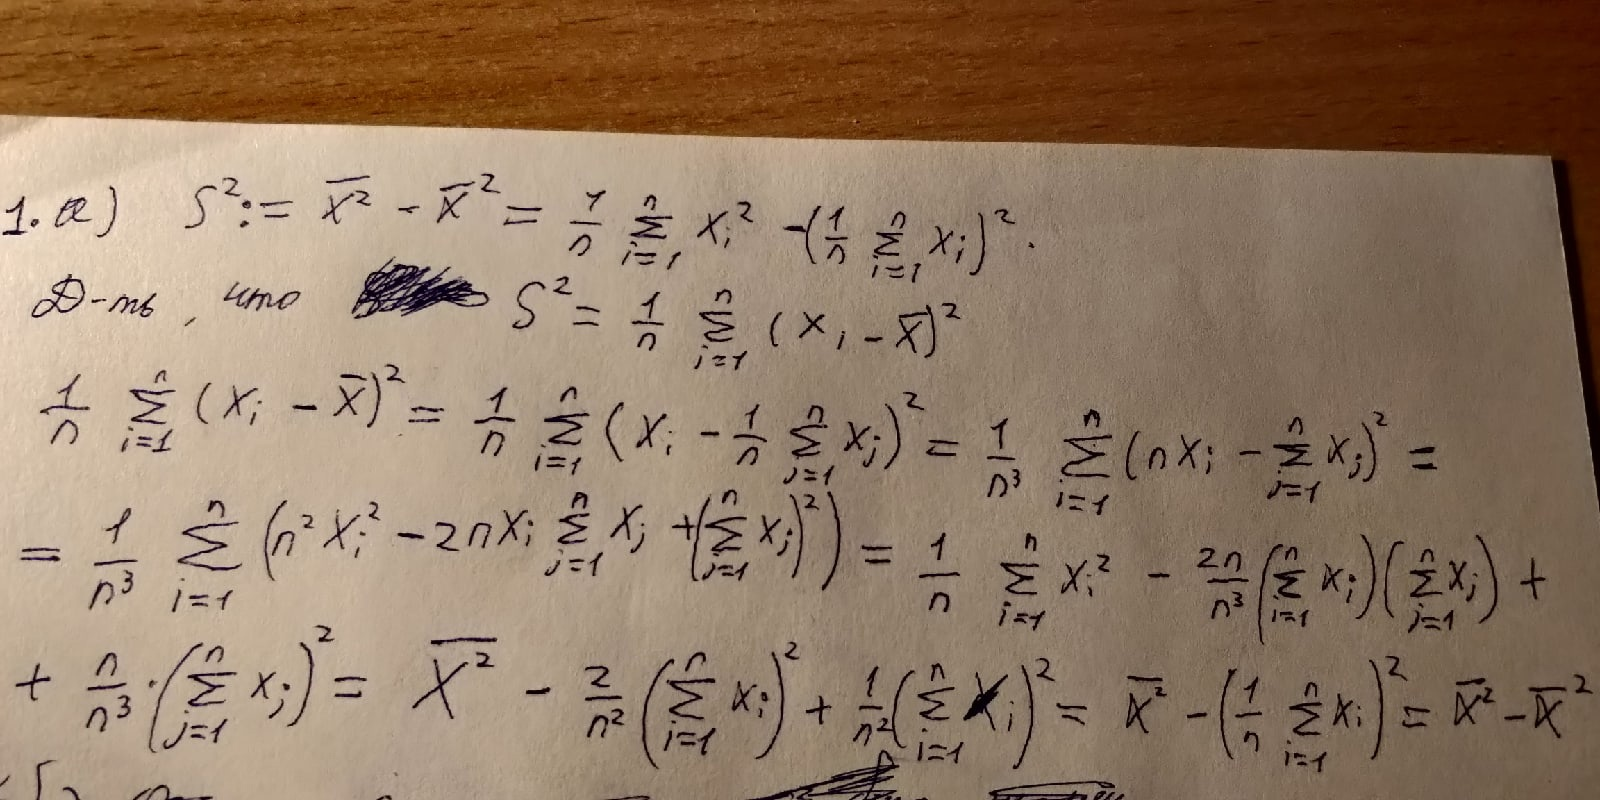

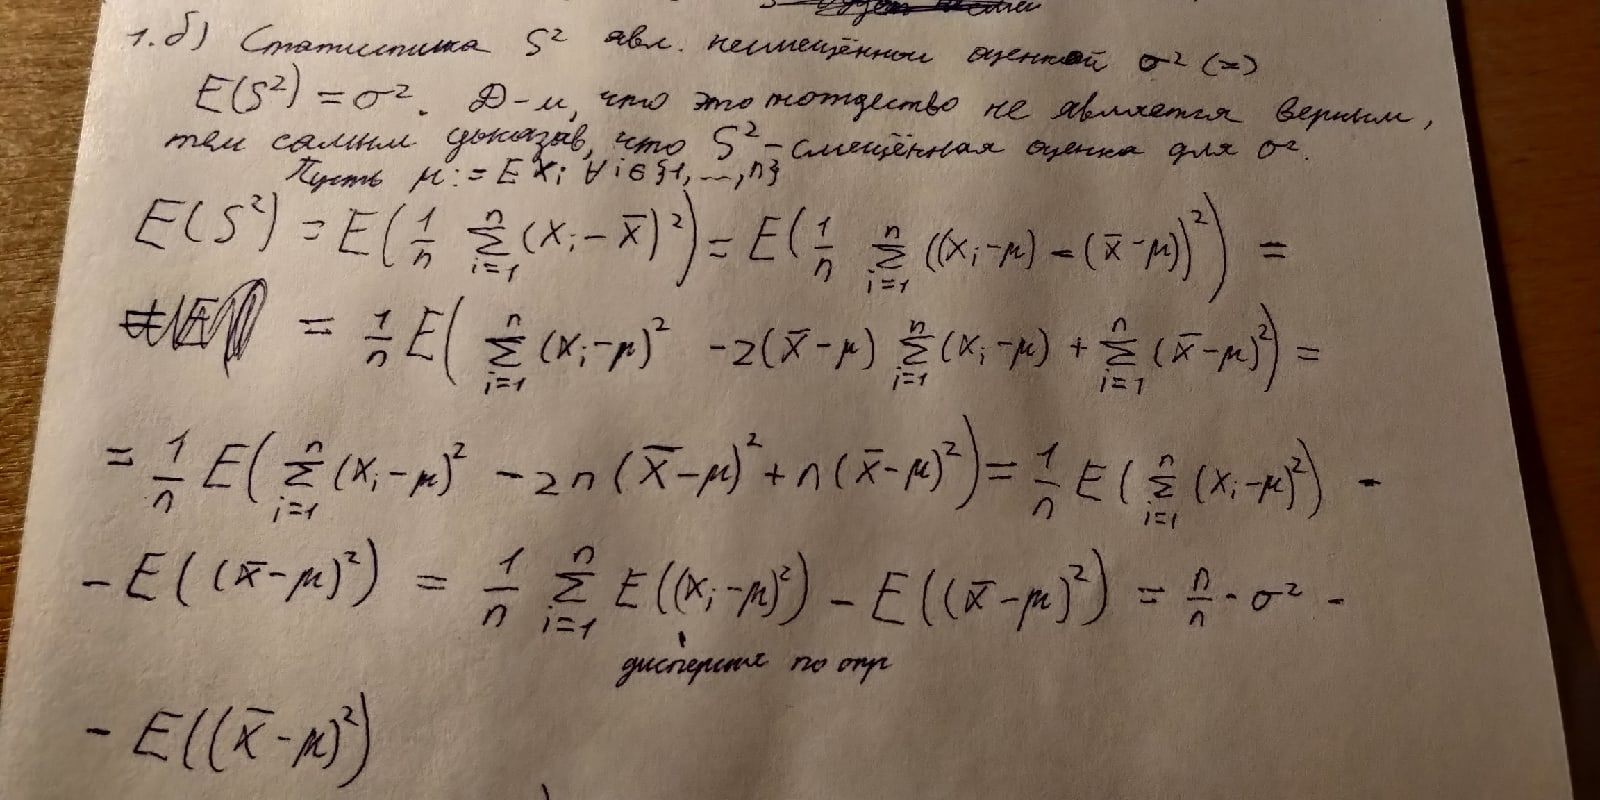

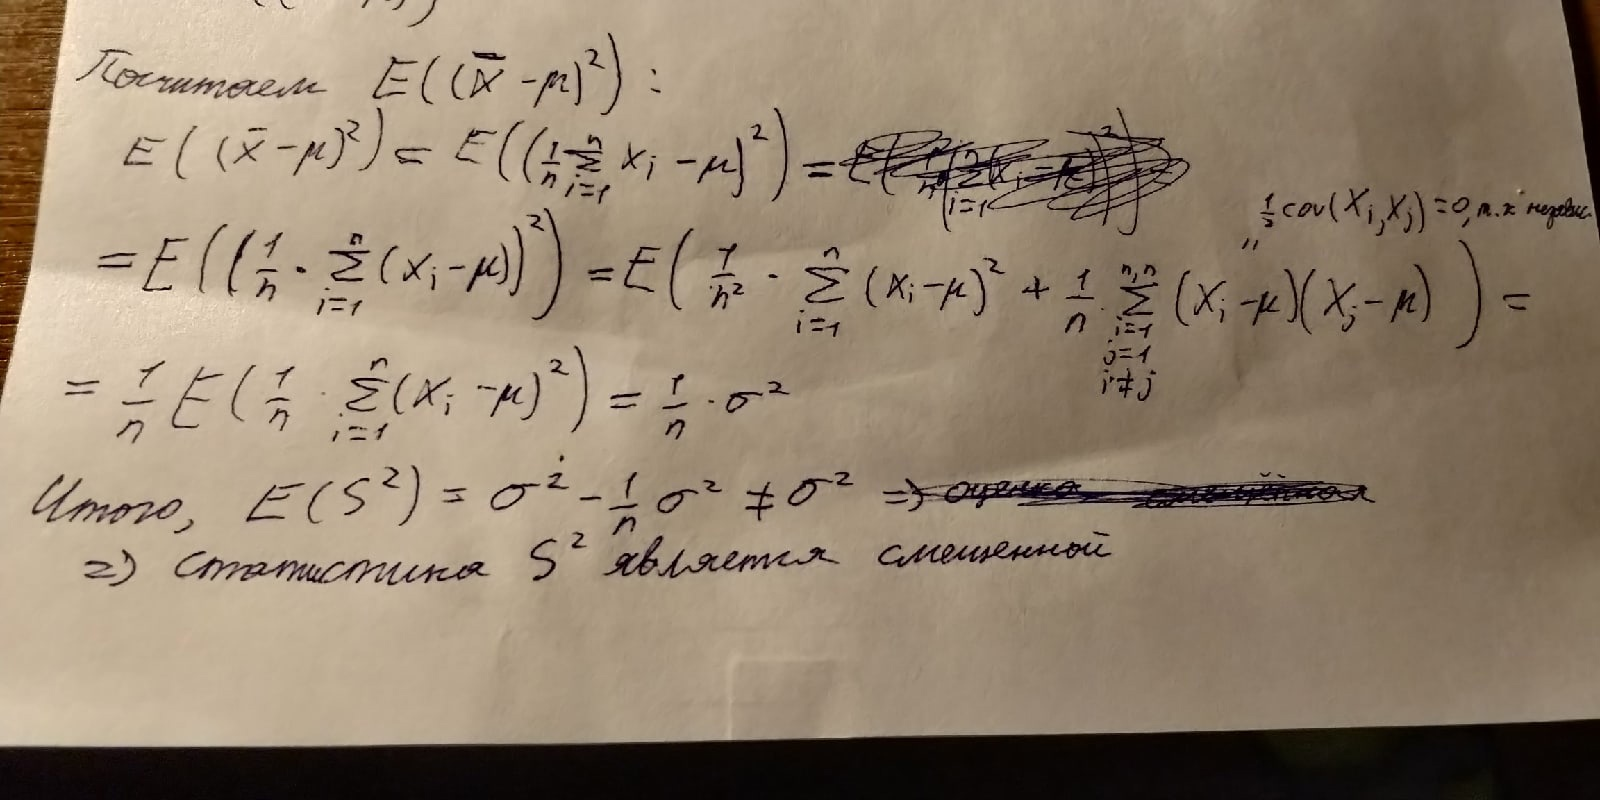

 ---
### Задача 2.   
Пусть $X_1, ..., X_n$ &mdash; выборка из распределения $\mathcal{N}(0, \sigma^2)$. В качестве оценок $\sigma^2$ обычно используют $S^2$ или $\frac{n}{n-1}S^2$. Что можно сказать про их несмещенность?

**Ответ:** Как уже было показано в пункте 1б, статистика $S^2$ является смещённой для оценки $\sigma^2$. В свою очередь, используя линейность математического ожидания и результат пункта 1.б, имеем, что $E\Big(\frac{n}{n-1}\cdot S^2\Big) = \sigma^2$, а значит статистика $\Big(\frac{n}{n-1}\Big)\cdot S^2$ является несмещённой для оценки $\sigma^2$. 

**1.** Теперь проверьте это на практике. Для каждой из приведенных выше оценок $\widehat{\theta}$ выполните следующие действия.

* Вычислите $k = 500$ независимых оценок $\widehat{\theta}_1, ... , \widehat{\theta}_k$ по независимым выборкам $(X_1^1, ... , X_n^1), ... , (X_1^k, ... , X_n^k)$, сгенерированным из распределения $\mathcal{N}(0, \sigma^2)$. Далее вычислите среднее этих оценок, которое обозначим $\overline{\theta}$.

* Визуализируйте полученные значения, построив на **одном** графике точки $(\widehat{\theta}_1, $y$), ... , (\widehat{\theta}_k, y)$ и среднее оценок $(\overline{\theta}, y)$, где $y$ &mdash; произвольные различные (например 0, 1, 2) координаты для двух различных типов оценок.

* Повторите действие три раза для $n \in \{10, 100, 500\}$. В итоге получится три графика для различных $n$, на каждом из которых изображено поведение двух типов оценок и их среднее.

Используйте приведенный ниже **шаблон** для визуализации значений.

**Внимание!** Следите за информативностью и наглядностью графиков. Например, пустых пространств должно быть как можно меньше, ничего не должно быть скомкано, вся нужная информация должна быть представлена. Посмотрите также презентацию с разбора задания 1. **Если график чему-то не удовлетворяет, оценка может быть снижена.**

Вместо использования `matplotlib` можно также строить графики с помощью `plotly`.

In [3]:
# Вначале:
#plt.figure(figsize=<размер>)

# Для каждой оценки:
#plt.scatter(<независимые оценки> , np.zeros(k) + y, 
 #           alpha=0.1, s=100, color=<цвет>, label=<метка>)
#plt.scatter(<независимые оценки>.mean(), y, marker='*', s=200, 
#            color='w', edgecolors='black')

# Для всего графика:
#plt.vlines(1, <наименьший y>, <наибольший y>, color='r')
#plt.title(f'Размер выборки = {k}')
#plt.yticks([])
#plt.legend()

**Решение:**

In [4]:
def generate_bad_thetas(n: int, k: int, loc = 0, sigma = 1):
    values =  sps.norm(loc, sigma).rvs((n, k))
    mean_values = values.sum(axis = 0) / n
    diffs = values - mean_values
    diffs **= 2
    thetas = diffs.sum(axis = 0) / n
    return thetas
thetas = generate_bad_thetas(100, 500)

In [5]:
def construct_graph(n:int, k:int, loc = 0, sigma = 1):
    plt.figure(figsize = (16,9))
    bad_thetas = generate_bad_thetas(n, k, loc, sigma)
    good_thetas = bad_thetas * (n / (n-1))
    list_of_thetas = [bad_thetas, good_thetas]
    #labels = [f'оценка $S^2$ при n = {n}',f'оценка $\frac{n}{n-1} S^2$ при n = {n}']
    labels = [f'Смещённая оценка при n = {n}',f'Несмещённая оценка при n = {n}']
    y_cords = [0.5, -0.5]
    colors = ['r', 'b']
    for values, y_cord, label, color in zip(list_of_thetas, y_cords, labels, colors):
        plt.scatter(values , np.zeros(k) + y_cord, 
            alpha=0.1, s=100, color=color, label=label)
        plt.scatter(values.mean(), y_cord, marker='*', s=200, 
            color='w', edgecolors='black')
    
    plt.vlines(sigma ** 2, -0.5, 1.5, color='r')
    plt.title(f'Размер выборки = {n}, стандартное отклонение равно = {sigma}')
    plt.yticks([])
    plt.legend()
    plt.show()
        
    

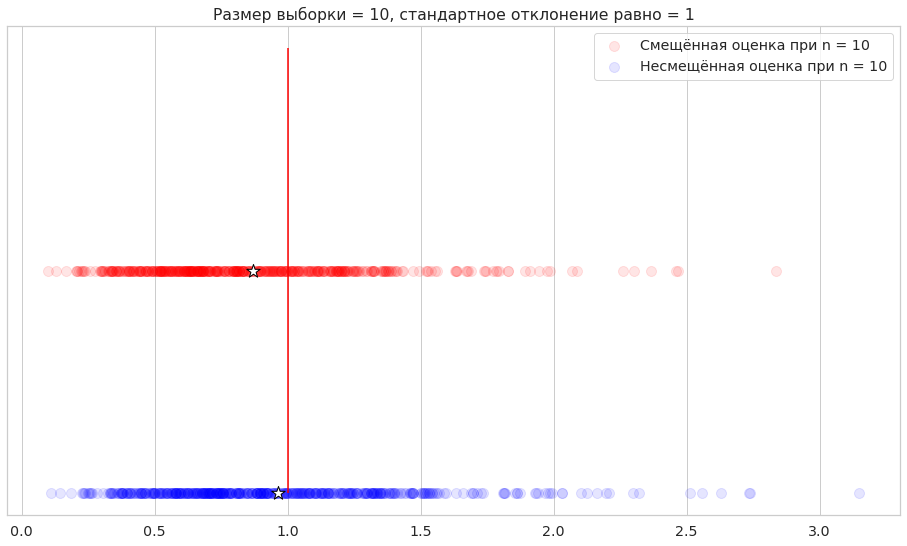

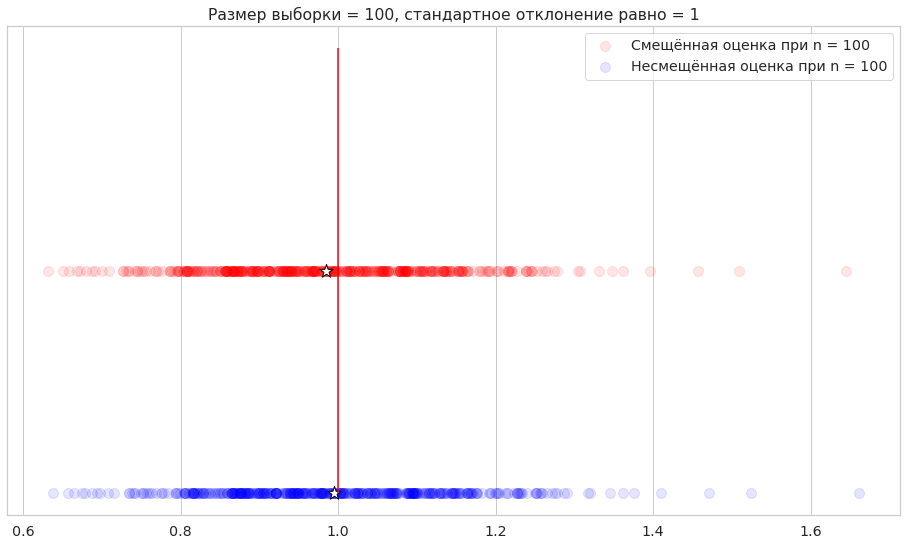

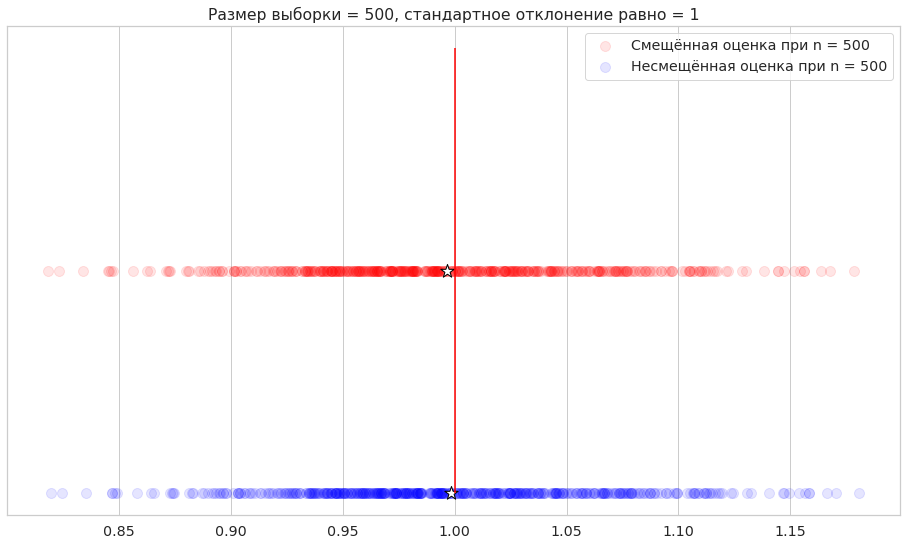

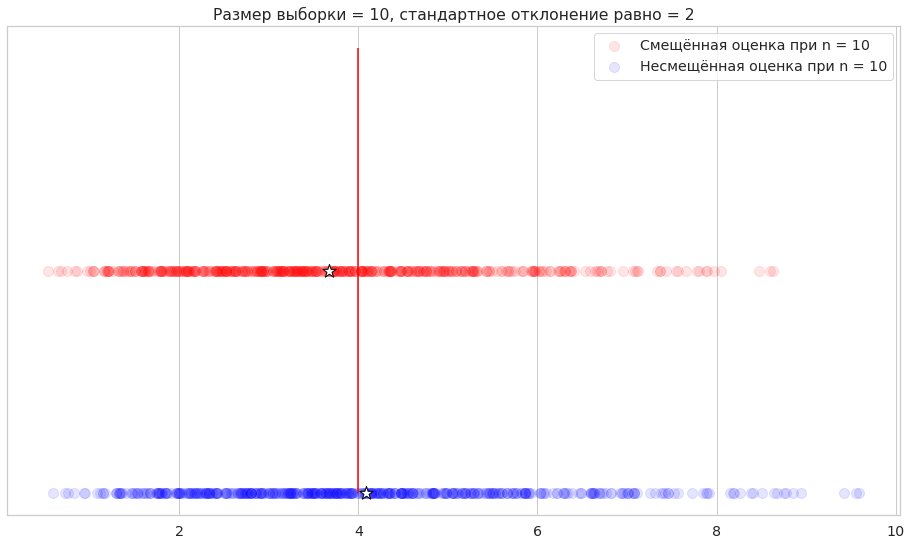

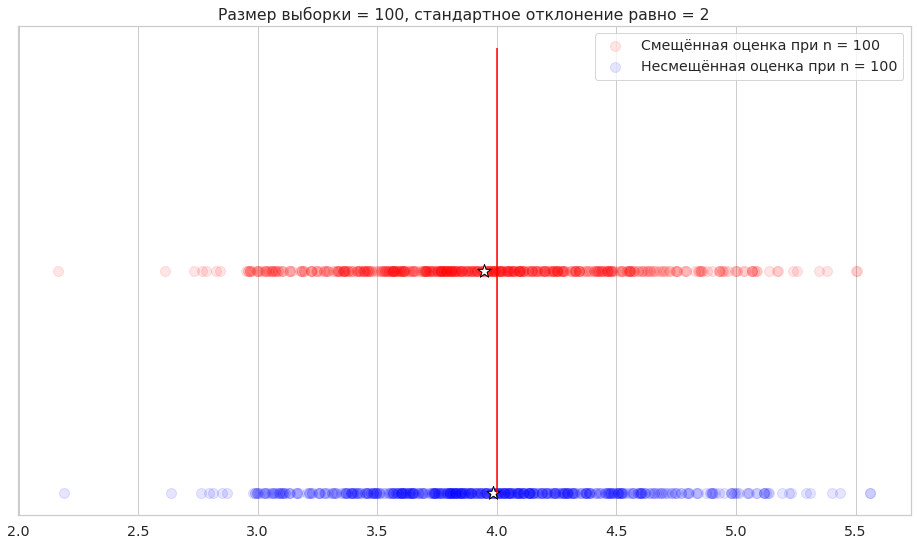

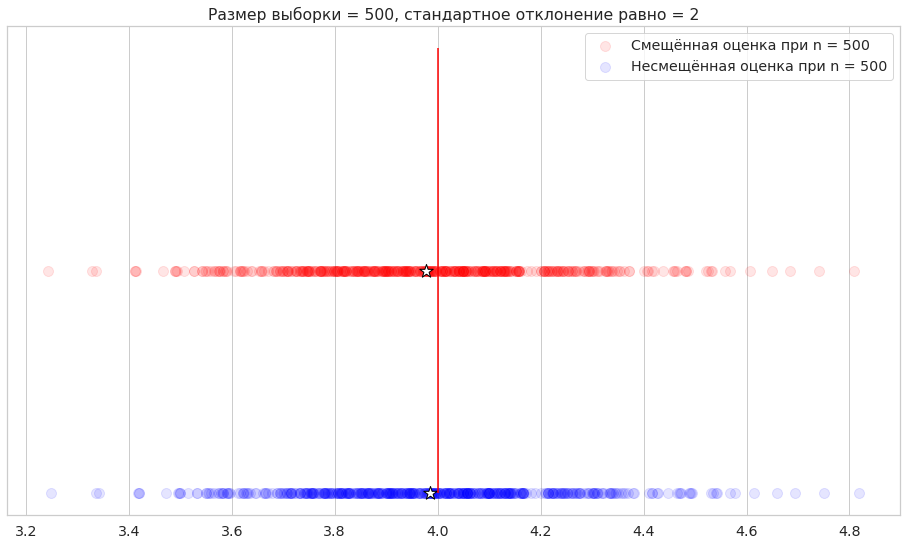

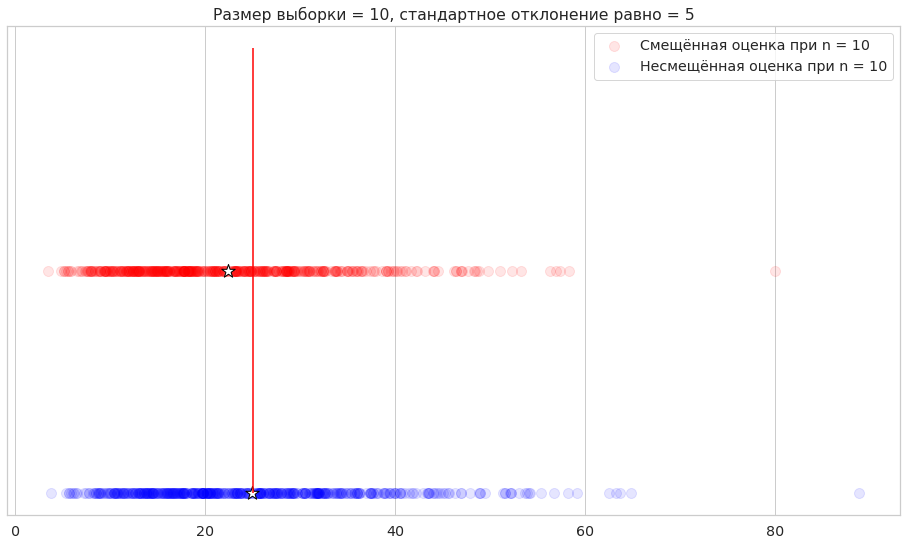

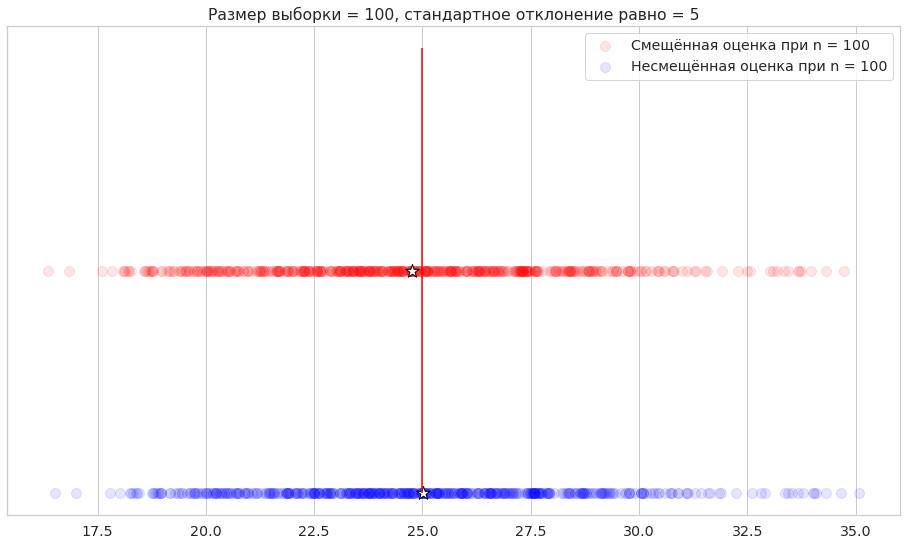

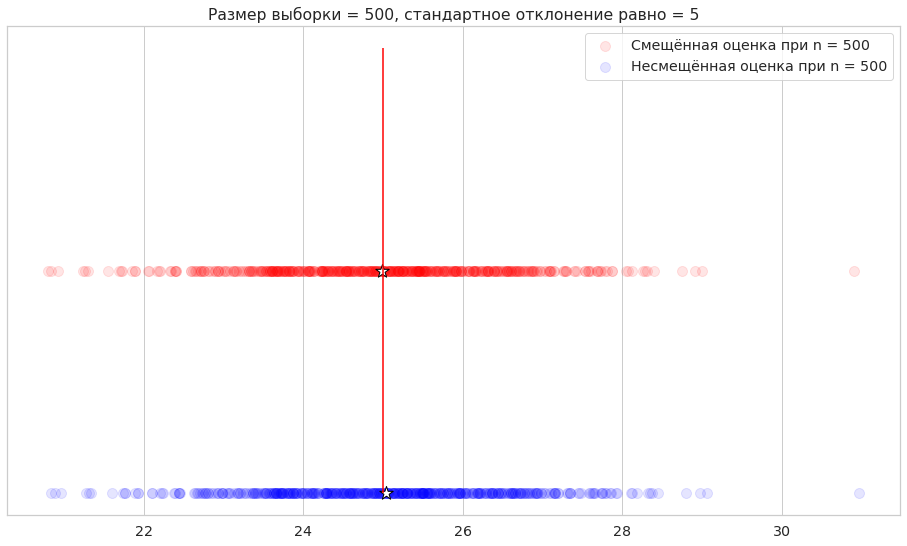

In [6]:
n_vals = [10, 100, 500]
k = 500
sigmas = [1,2,5]
for sigma in sigmas:
    for n in n_vals:
        construct_graph(n,k,0,sigma)
    

**2.** Изучим поведение среднего оценок из первого пункта при росте размера выборки. Постройте график зависимости $\overline{\theta}$ от $n$ для двух типов оценок. Для вычисления зависимости нужно один раз сгенерировать выборки из пункта 1 достаточно большого размера (не более 500) и посчитать оценки по подвыборкам, используя <a href="https://mipt-stats.gitlab.io/courses/python/05_numpy.html#2.1-Математические-операции">функции</a> из `numpy`. Использовать циклы, а так же функции, разворачивающиеся в цикл (например, `np.vectorize`), запрещено. Какие из оценок являются асимптотически несмещёнными, т.е. $\forall \theta \in \Theta\colon \mathsf{E}_\theta \widehat{\theta} \to \theta$ при $n\to +\infty$?

**Решение:**

In [7]:
def generate_cum_bad_thetas(n: int, k: int, loc = 0, sigma  = 1):
    values =  sps.norm(loc, sigma).rvs((k, n))
    square_values = values ** 2
    adder = square_values.cumsum(axis = 1) / np.linspace(1,n,n)
    substractor = values.cumsum(axis = 1) / np.linspace(1,n,n)
    substractor **= 2
    return adder.mean(axis = 0) - substractor.mean(axis = 0)

In [8]:
def generate_cum_good_thetas(bad_cum, n):
    res = bad_cum * np.linspace(1,n,n)
    res[1:] = res[1:] / np.linspace(1,n - 1,n - 1)
    res[0] = 0
    return res


In [9]:
def dependency_by_select_size(n: int, k: int, loc = 0, sigma  = 1):
    plt.figure(figsize = (16,9))
    bad_cum = generate_cum_bad_thetas(n, k, loc, sigma)
    good_cum = generate_cum_good_thetas(bad_cum, n)
    plt.scatter(np.linspace(1, n, n) , bad_cum, 
            alpha=0.3, s=10, color='r', label=' смещённая оценка')
    plt.scatter(np.linspace(1, n, n) , good_cum, 
            alpha=0.3, s=10, color='blue', label='несмещённая оценка')
    plt.title('график зависимости $\\overline{\\theta}$ от $n$')
    plt.yticks([0,1,1.2])
    plt.xlabel("n")
    plt.ylabel("$\\overline{\\theta}$")
    plt.legend()
    plt.show()


    
    

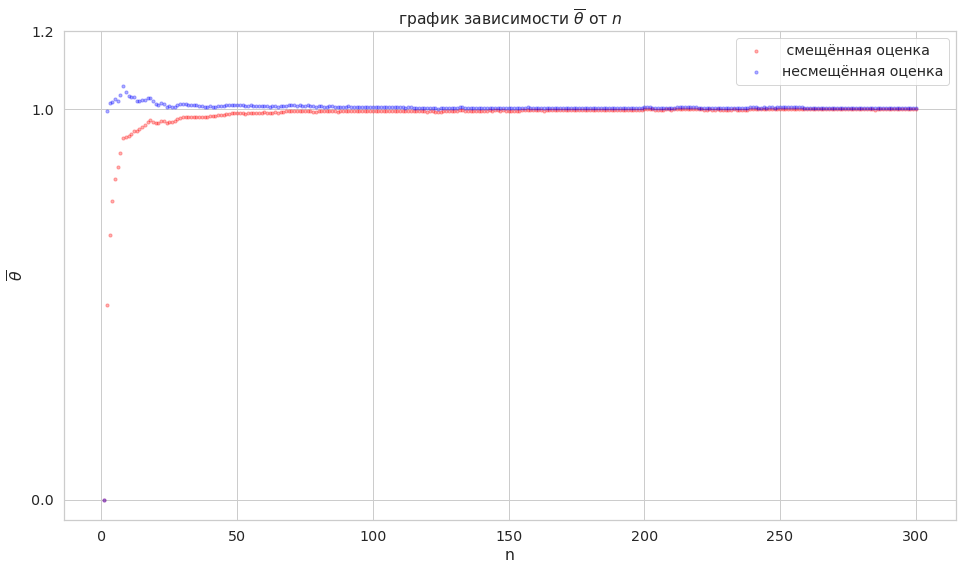

In [10]:
dependency_by_select_size(300, 500, 0, 1)

**Выводы:**

Сделайте вывод о том, что такое свойство несмещенности. Подтверждают ли сделанные эксперименты полученное в теоретических задачах свойство несмещенности (или отсутствие этого свойства) данных оценок? Поясните, почему в лабораторных по физике при оценке погрешности иногда используют $n-1$ в знаменателе, а не $n$.

В физике часто используют именно несмещённую оценку, так как часто нету возможности проделать большое количество экспериментов.

Свойство несмещенности у оценки -- это свойство того, что математическое ожидание этой оценки равно оцениваемому параметру. Проделанные эксперименты полностью подтверждают свойство смещенности и несмещенности рассматримаемых оценок. Оценка $\frac{n}{n - 1} \cdot S^2$ ближе к значению дисперсии, чем оценка $S^2$. В то же время, последний график говорит нам о том, что обе оценки являются асимптотически несмещёнными.

*Замечание.* Проведенные эксперименты позволяют сделать вывод только о поведении среднего значения оценки, но ничего не говорят о том, насколько велик их разброс относительно среднего.

 ---
### Задача 3.   

В этой задаче вам нужно будет проанализировать вакансии на сайте <a target="_blank" href="https://hh.ru/">hh.ru</a>. Для сбора данных рекомендуется использовать <a target="_blank" href="https://dev.hh.ru/">официальное API</a>.

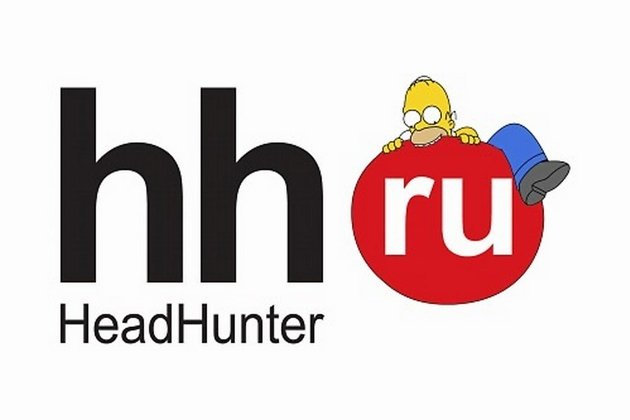

**1. Сбор данных**

Соберите данные о вакансии Data Scientist по Москве в одну таблицу и подготовьте их для анализа. Часто в индустрии подготовленные для анализа таблицы называют *витринами*. В ней должны быть:
- название вакансии,
- работодатель,
- зарплатная вилка,
- станция метро,
- ссылка на вакансию,
- опыт,
- требуемые навыки,
- что-то еще по вашему желанию.

Креативность приветствуется. При работе с данными о заработной плате обратите внимание на валюту и <a target="_blank" href="https://yandex.ru/search/?text=gross%2Fnet&clid=1955455&win=446&lr=213&noreask=1">gross/net</a>. 

**При работе с API не забывайте делать паузы между запросами, чтобы не задудосить сервер HeadHunter.**

Пример запроса к API:

In [11]:
URL = 'https://api.hh.ru/vacancies'
vac_names = ['data scientist', 'data science', 'big data scientist', 
             'big data science', 'data analyst', 'data analytics']
exchange_rates = {
    'RUR' : 1,
    'USD' : 76.75,
    'EUR' : 92.4
}
per_page_lim = 100


In [12]:
def take_links(url : str, vac_names, area_num = 1):
    res = []
    for vacancy in vac_names:
        first_req = requests.get(url,{'text': vacancy, 'area': area_num,'page': 0,'per_page': per_page_lim})
        data = json.loads(first_req.content.decode())
        number_of_vacs = data['found']
        current_page  = 0
        while current_page * per_page_lim < number_of_vacs:
            new_page_req = requests.get(URL,{'text': vacancy, 'area': area_num,'page': 0,'per_page': per_page_lim})
            data = json.loads(new_page_req.content.decode())
            for v in data['items']:
                res.append(v['url'])
            current_page += 1
            sleep(0.1)
    return res

In [13]:
links = take_links(URL, vac_names)

In [14]:
def take_data_from_urls(links: list) -> dict:
    res = []
    iterw  = 0
    for link in links:
        try:
            print(iterw)
            iterw += 1
            req = requests.get(link, {})
            content = json.loads(req.content.decode())
            res.append(content)
        except:
            continue
        sleep(0.01)
    return res

In [15]:
raw_data = []

In [28]:
raw_data = take_data_from_urls(links)

In [30]:
with open('raw_data.json', 'w') as outfile:
    json.dump(raw_data, outfile)

In [16]:
with open('raw_data.json', 'r') as infile:
    raw_data = json.load(infile)

In [17]:
def prepare_vacancies_for_analisys(raw_data: list, tax_rate: float = 0.13) -> pd.DataFrame:
    ready_vacancies = []
    def prepare_one_vacancy(vac: dict) -> dict:
        return_data = {
            'vacantion_nm': vac['name'],
            'employer_nm': vac['employer']['name'],
            'url': 'https://api.hh.ru/vacancies/' + vac['id'] + '?host=hh.ru',
            'work_experience': vac['experience']['id']
        }
        return_data['key_skills'] = []
        for skill in vac['key_skills']:
              return_data['key_skills'].append(skill['name'])
        return_data['key_skills'] = " ".join(   return_data['key_skills'])
        if vac['address'] is not None and vac['address']['metro'] is not None: # assertions
            return_data['metro'] = vac['address']['metro']['station_name']
        if vacancy['salary'] is not None: # once more
            return_data['salary from'] = vac['salary']['from']
            return_data['salary to'] = vac['salary']['to']
            return_data['salary currency'] = vac['salary']['currency']
            return_data['salary gross'] = vac['salary']['gross']
            coeff = 1
            if return_data['salary gross']:
                coeff = 1 - tax_rate
            if  return_data['salary from'] is not None and return_data['salary to'] is not None:
                return_data['net salary expectation in RUR'] = (return_data['salary from'] + return_data['salary to']) / 2
            elif return_data['salary from'] is not None and return_data['salary to'] is None:
                 return_data['net salary expectation in RUR'] = return_data['salary from'] * 1.25
            elif return_data['salary from'] is None and return_data['salary to'] is not None:
                return_data['net salary expectation in RUR'] = return_data['salary to'] * 0.8
            if  return_data['net salary expectation in RUR'] is not None:
                if return_data['salary currency'] is not None:
                    return_data['net salary expectation in RUR'] *= exchange_rates[return_data['salary currency']]
                return_data['net salary expectation in RUR']  *= coeff
        return return_data
    for vacancy in raw_data:
        ready_vacancies.append(prepare_one_vacancy(vacancy))
    vacancies_frame = pd.DataFrame(ready_vacancies).dropna(subset=['vacantion_nm', 'url'])
    return vacancies_frame   

In [18]:
vacancies = prepare_vacancies_for_analisys(raw_data)
vacancies

vacantion_nm  \
0                             Стажер data scientist   
1                           Аналитик Data Scientist   
2     Data Scientist в области компьютерного зрения   
3          Data Scientist / Quantitative Researcher   
4                             Junior Data Scientist   
...                                             ...   
3851                                    CRM analyst   
3852                       Big-Data & HPC Scientist   
3853                  Data Quality Analyst (Remote)   
3854                          BI Analyst (Planning)   
3855                             E-commerce analyst   

                                            employer_nm  \
0                                СИБУР, Группа компаний   
1                                             Стоматорг   
2                               Fair Print & High Store   
3                                      Знаменка Капитал   
4     Институт прикладных экономических исследований...   
...                                                 ...   
3851                                             adidas   
3852                                             HUAWEI   
3853                                          Brandquad   
3854                            Лаборатория Касперского   
3855                                 Philips HealthTech   

                                                  url work_experience  \
0     https://api.hh.ru/vacancies/44150000?host=hh.ru    noExperience   
1     https://api.hh.ru/vacancies/44132320?host=hh.ru    between1And3   
2     https://api.hh.ru/vacancies/43896076?host=hh.ru    noExperience   
3     https://api.hh.ru/vacancies/43471916?host=hh.ru    between3And6   
4     https://api.hh.ru/vacancies/43825932?host=hh.ru    between1And3   
...                                               ...             ...   
3851  https://api.hh.ru/vacancies/43511677?host=hh.ru    between1And3   
3852  https://api.hh.ru/vacancies/43655613?host=hh.ru    between3And6   
3853  https://api.hh.ru/vacancies/43681409?host=hh.ru    between3And6   
3854  https://api.hh.ru/vacancies/42600555?host=hh.ru    between3And6   
3855  https://api.hh.ru/vacancies/43627515?host=hh.ru    between1And3   

                                             key_skills  salary from  \
0                         Python SQL R machine learning          NaN   
1     Python MS Visio Бизнес-анализ Аналитические ис...     180000.0   
2     C++ Тестирование MATLAB Гарант плюс Бизнес-кон...     150000.0   
3     Mathematical Statistics Mathematical Programmi...     250000.0   
4     PyTorch TensorFlow Scikit-learn xgboost Python...     120000.0   
...                                                 ...          ...   
3851                                                             NaN   
3852  High-Performance Computing System Design Algor...          NaN   
3853  Parsing Парсинг Parser Анализ баз данных Data ...          NaN   
3854  MS PowerPoint Английский язык Business Plannin...          NaN   
3855        Market Research Data Analysis WEB аналитика          NaN   

      salary to salary currency salary gross  net salary expectation in RUR  \
0           NaN             NaN          NaN                            NaN   
1      250000.0             RUR         True                       187050.0   
2      150000.0             RUR        False                       150000.0   
3           NaN             RUR         True                       271875.0   
4           NaN             RUR         True                       130500.0   
...         ...             ...          ...                            ...   
3851        NaN             NaN          NaN                            NaN   
3852        NaN             NaN          NaN                            NaN   
3853   150000.0             RUR        False                       120000.0   
3854        NaN             NaN          NaN                            NaN   
3855        NaN             NaN          NaN              

In [19]:
def create_metro_location_frame(raw_data: list) -> pd.DataFrame:
    metro_stations = []
    for vacancy in raw_data:
        if vacancy['address'] is not None:
            if vacancy['address']['metro'] is not None:
                station_name = vacancy['address']['metro']['station_name']
                new_metro = {
                    'name': station_name, 
                    'latitude': vacancy['address']['metro']['lat'],
                    'longitude': vacancy['address']['metro']['lng']
                }
                metro_stations.append(new_metro)
    metro_info = pd.DataFrame(metro_stations).drop_duplicates()
    metro_info = metro_info.set_index('name')
    return metro_info

In [20]:
metro_info = create_metro_location_frame(raw_data)
len(metro_info)

60

**2. Анализ и визуализация данных**

Проведите исследование получившихся данных. Прежде всего убедитесь, что ваши данные чистые. Убедитесь, что вы проделали следующее:
- удаление дубликатов,
- предобработка пропусков,
- предобработка текстовых данных.

Среди вакансий можно выделять группы. *Например*, бизнес-аналитик, BI аналитик, продуктовый аналитик.

Ответьте не следующие вопросы:  
- Сколько сейчас доступно вакансий по вашему запросу?
- Выделяются ли среди вакансий какие-то группы? 
- Какие группы вакансий самые популярные?
- Какова средняя и медианная заработная плата?
- Какие ключевые навыки требуются для данной вакансии?
- Какой опыт требуется для данной вакансии?
- Какие работодатели в топе? 
- В каком районе Москвы данная вакансия пользуется наибольшим и наименьшим спросом?

Не забудьте про визуализацию &mdash; для этого используйте библиотеку plotly. Постройте следующие графики:
- гистограмма распределения заработной платы;
- heatmap, отображающий зависимость количества вакансий от группы и навыка;
- зависимость средней заработной платы от требуемых навыков;
- распределение средней заработной платы по карте Москвы;
- распределение спроса на вакансию по карте Москвы.

Для построения последних двух графиков вам могут понадобиться <a target="_blank" href="http://www.lovrikinfo.ru/metrogps.php">внешние данные</a>.


In [21]:
import re as for_regular
def find_number_of_vacancies(vacancies: pd.DataFrame):
    return len(vacancies)

In [22]:
support_gr = ['data', 'данных', 'big', 'product', 'lead', 'в', 'по','of', 'research', "разработчик", "analytics",
                           'science', 'quantitative', 'аналитик', 'team', 'ведущий',"продуктовый","старший", 'intelligence',
             'and', 'и']

groups_tr = {
    'analyst': 'Аналитик',
    'scientist': 'Исследователь',
    'senior' : 'Старший разработчик',
    'engineer': 'Инженер',
    'analytics': 'Аналитик',
    'business': 'Бизнес аналитик',
    'middle': 'Средний разработчик',
    'junior': 'Младший разработчик',
    'python': 'Python разработчик',
    'bi': 'Бизнес менеджмент',
    'manager': 'Менеджер',
    "system": 'Системный администратор',
    'marketing': 'Маркетинговый директор',
    'intern': 'Стажер',
    'ml': 'Разработчик машинного обучения',
    '': ''
}

def find_top_groups(vacancies: pd.DataFrame, support_words: list, groups_translator, number_of_best= 13):
    interesting_vacancies = vacancies['vacantion_nm'].dropna()
    all_vacancies_as_str = " ".join( interesting_vacancies).lower()
    words = for_regular.split('[^a-zA-Zа-яА-Я]', all_vacancies_as_str)
    calc_groups = pd.Series(words).value_counts().drop(support_words).head(number_of_best)
    calc_groups = calc_groups.to_frame(name = 'Количество предложений')
    calc_groups = calc_groups.rename_axis('Вакансия').reset_index()
    calc_groups['Вакансия'] = calc_groups['Вакансия'].apply(lambda key: groups_translator[key])
    new_groups = calc_groups.groupby('Вакансия').sum().sort_values(by='Количество предложений', ascending = False)
    new_groups = new_groups.drop('')
    return new_groups

In [23]:
def find_mean_and_median(df: pd.DataFrame, column):
    mean_val = df[column].mean()
    median_val = df[column].median()
    return np.round(mean_val, decimals = 1), np.round(median_val, decimals = 1)

In [24]:
support_sk = ['ms','язык',"данных", 'data', 'математическая', "анализ","skills", 'project', 'learning'] 

skills_tr = {
    'python': 'Python',
    'sql': 'SQL',
    'analysis': 'Анализ',
    'английский': 'Английский язык',
    'mining': 'Майнинг',
    'статистика': "Математическая статистика",
    'management': 'Менеджмент',
    'powerpoint': 'Презентации',
    'business':'Бизнес аналитика',
    'machine': 'Машинное обучение',
    'моделирование': '3D Моделирование',
    '': ''
}
def find_top_skills(vacancies: pd.DataFrame, support_words: list, translator, number_of_best= 12):
    skills = vacancies['key_skills'].dropna()
    all_skills_words_as_str = " ".join(skills).lower()
    words = for_regular.split('[^a-zA-Zа-яА-Я]', all_skills_words_as_str)
    calc_groups = pd.Series(words).value_counts().drop(support_words).head(number_of_best)
    calc_groups = calc_groups.to_frame(name = 'Количество упоминаний')
    calc_groups = calc_groups.rename_axis('Умение').reset_index()
    calc_groups['Умение'] = calc_groups['Умение'].apply(lambda key: translator[key])
    new_groups = calc_groups.groupby('Умение').sum().sort_values(by='Количество упоминаний', ascending = False)
    new_groups = new_groups.drop('')
    return new_groups

In [25]:
def find_need_experience(vacancies:pd.DataFrame):
    skills = vacancies['skills'].dropna()
    all_skills_words_as_str = " ".join(skills).lower()
    values = pd.Series(for_regular.split('[^0-9]', all_skills_words_as_str))
    values = values[values != '']
    values = values.astype(int)
    values = values[values < 10]
    return np.round(values.mean(), decimals = 1)

In [26]:
def find_need_experience(vacancies:pd.DataFrame):
    expr = vacancies['work_experience'].dropna()
    years = []
    for vac in expr:
        if vac == 'noExperience':
            years.append(0)
        elif vac == 'between1And3':
            years.append(2)
        elif vac == 'between3And6':
            years.append(4.5)
        elif vac == 'moreThan6':
            years.append(7)   # fair enough
    return pd.Series(years).mean()

In [27]:
def find_top_employers(vacancies: pd.DataFrame, number_of_best: int  = 15):
    result = vacancies.groupby('employer_nm').count().sort_values('vacantion_nm', ascending = False)
    result = result[['vacantion_nm']]
    result = result.rename({'vacantion_nm': 'Количество васансий'},axis='columns')
    return result.head(number_of_best)

In [28]:
def salary_histogram(vacancies: pd.DataFrame):
    ax = px.histogram(data_frame = vacancies, x = 'net salary expectation in RUR',nbins = 25)
    ax.update_layout(
        title="Гистограмма средней зарплаты",
        xaxis_title="Зарплата",
        yaxis_title="Число вакансий"
    )
    ax.show()

In [29]:
plt.figure(figsize = (16,9))
def write_group_skill_map(vacancies, supp_wr1, supp_wr2, groups_tr, skills_tr, vmax, num_gr = 12, num_sk = 12):
    vacancies_cp = vacancies
    groups = vacancies['vacantion_nm'].dropna()
    all_groups_words = " ".join(groups).lower()
    groups_words = for_regular.split('[^a-zA-Zа-яА-Я]', all_groups_words)
    biggest_groups = pd.Series(groups_words).value_counts().drop(supp_wr1).head(num_gr).drop('').index
    skills = vacancies['key_skills'].dropna()
    all_skills_words = " ".join(skills).lower()
    skills_words = for_regular.split('[^a-zA-Zа-яА-Я]', all_skills_words)
    best_skills = pd.Series(skills_words).value_counts().drop(supp_wr2).head(num_sk).drop('').index
    for group in biggest_groups:
        vacancies_cp[group] = vacancies['vacantion_nm'].str.contains(group, case = False).fillna(False)
    for skill in best_skills:
        vacancies_cp[skill] = vacancies['key_skills'].str.contains(skill, case = False).fillna(False)
    graph_data = np.zeros([len(biggest_groups), len(best_skills)])
    for group_index, group in zip(range(len(biggest_groups)), biggest_groups):
        for skill_index, skill in zip(range(len(best_skills)), best_skills):
            graph_data[group_index][skill_index] = len(vacancies_cp[(vacancies_cp[group]) & (vacancies_cp[skill])])
    biggest_groups = list(map(lambda key: groups_tr[key], biggest_groups))
    best_skills = list(map(lambda key: skills_tr[key], best_skills))
    ax = px.imshow(graph_data, zmax = vmax)
    ax.update_layout(
    yaxis = {
        'tickvals' : list(range(len(biggest_groups))),
        'ticktext' : biggest_groups
    },
    xaxis = {

        'tickvals' : list(range(len(best_skills))),
        'ticktext' : best_skills
    },
     width=900,
    height=900
    )
    ax.show()

<Figure size 1152x648 with 0 Axes>

In [30]:
def write_mean_salary_by_skills(vacancies, support_sk, skills_tr):
    vacancies_cp = vacancies
    skills = vacancies['key_skills'].dropna()
    all_skills_words_as_str = " ".join(skills).lower()
    words = for_regular.split('[^a-zA-Zа-яА-Я]', all_skills_words_as_str)
    best_skills = pd.Series(words).value_counts().drop(support_sk).head(12).drop('').index
    for skill in best_skills:
        vacancies_cp[skill] = vacancies['key_skills'].str.contains(skill, case = False).fillna(False)
    data_to_write = []
    for skill in best_skills:
        info_about_skill = {
            'Умение': skill,
            'Средняя зарплата': vacancies_cp[vacancies[skill] == True]['net salary expectation in RUR'].mean()
        }
        data_to_write.append(info_about_skill)
    frame_to_write = pd.DataFrame(data_to_write).set_index('Умение')
    frame_to_write = frame_to_write[frame_to_write['Средняя зарплата'] > 0]
    frame_to_write.index = list(map(lambda key: skills_tr[key], frame_to_write.index ))
    ax = px.bar(frame_to_write, x=frame_to_write.index, y='Средняя зарплата')
    ax.update_layout(xaxis_title = 'Ключевые умения', yaxis_title = 'Зарплата')
    ax.show()

In [31]:
def write_vacancies_on_map(vacancies, metro):
    vacancies_to_metro =  vacancies.dropna(subset=['metro']).groupby('metro').count()
    vacancies_to_metro = vacancies_to_metro[['vacantion_nm']].rename(columns =  {'vacantion_nm': 'Число вакансий'})
    vacancies_to_metro = vacancies_to_metro.join(metro, on = 'metro')
    px.set_mapbox_access_token(token)
    ax = px.scatter_mapbox(vacancies_to_metro,size = 'Число вакансий', lat = 'latitude', lon = 'longitude',
                           labels = {'longitude': 'долгота', 'latitude': 'широта'},
                          color_continuous_scale=px.colors.cyclical.IceFire, zoom=10)
    ax.update_layout(
        hovermode='closest',
        mapbox=dict(
            center=pgo.layout.mapbox.Center(
                lat=55.76,
                lon=37.62
            ),
            pitch=0,
            zoom=9.3
        )
    )
    ax.show()
    return vacancies_to_metro    

In [32]:
def write_salaries_and_number_of_vacations_on_map(vacancies, metro):
    number_of_vacancies_to_metro = write_vacancies_on_map(vacancies, metro)
    vacancies_to_metro_by_salary =  vacancies.dropna(subset=['metro']).groupby('metro')
    vacancies_to_metro_by_salary = vacancies_to_metro_by_salary[['net salary expectation in RUR']].mean()
    result_to_print = number_of_vacancies_to_metro.join(vacancies_to_metro_by_salary, on = 'metro')
    result_to_print = result_to_print.dropna(subset = ['net salary expectation in RUR'])
    px.set_mapbox_access_token(token)
    ax = px.scatter_mapbox(result_to_print,
                           size = 'Число вакансий', color = 'net salary expectation in RUR', 
                           lat = 'latitude', lon = 'longitude',
                           labels = {'longitude': 'долгота', 'latitude': 'широта'}, zoom=10)
    ax.update_layout(
        mapbox=dict(
            center=pgo.layout.mapbox.Center(
                lat=55.76,
                lon=37.62
            ),
            pitch=0,
            zoom=9.3
        )
    )
    ax.show()
    return result_to_print

In [33]:
def print_all_investigated_info(vacancies, metro , support_gr, support_sk, groups_tr, skills_tr):
    print('На данный момент доступно',find_number_of_vacancies(vacancies), 'вакансий')
    print()
    print('На данный момент хорошо выделяются следующие группы:')
    display(find_top_groups(vacancies, support_gr, groups_tr))
    print()
    mean_salary, median_salary = find_mean_and_median(vacancies, 'net salary expectation in RUR')
    print(f'На данный момент средняя заработная плата составляет {mean_salary} рублей')
    print(f'На данный момент медианная заработная плата составляет {median_salary} рублей')
    print()
    print('Выделяются следующие ключевые навыки:')
    display(find_top_skills(vacancies, support_sk, skills_tr))
    print()
    mean_exp = np.round(find_need_experience(vacancies), 1)
    print('Средний опыт работы, который требуют работодателей, составляет', mean_exp, 'года')
    print()
    print('На данный момент самыми популярными работодателями являются:')
    display(find_top_employers(vacancies))
    print()
    print('Гистограмма распределения средней заработной платы выглядит следующим образом:')
    salary_histogram(vacancies)
    print()
    print('зависимость количества вакансий от группы и навыка выглядит следующим образом:')
    write_group_skill_map(vacancies, support_gr, support_sk, groups_tr, skills_tr, 500)
    print('Средняя заработная плата относительно наиболее распространённых навыков выглядит так:')
    write_mean_salary_by_skills(vacancies, support_sk, skills_tr)
    print()
    print('Графики спроса на вакансию и средней заработной платы по карте Москвы выклядят следующим образом:')
    write_salaries_and_number_of_vacations_on_map(vacancies, metro)
    

In [34]:
print_all_investigated_info(vacancies, metro_info,support_gr, support_sk, groups_tr, skills_tr)

На данный момент доступно 3856 вакансий

На данный момент хорошо выделяются следующие группы:


Количество предложений
Вакансия                                       
Аналитик                                   1528
Исследователь                              1079
Старший разработчик                         503
Инженер                                     445
Бизнес аналитик                             197
Младший разработчик                         142
Бизнес менеджмент                           141
Средний разработчик                         108
Стажер                                       97
Маркетинговый директор                       95
Менеджер                                     92
Системный администратор                      66


На данный момент средняя заработная плата составляет 216776.1 рублей
На данный момент медианная заработная плата составляет 200000.0 рублей

Выделяются следующие ключевые навыки:


Количество упоминаний
Умение                                          
SQL                                         2323
Python                                      1945
Анализ                                       846
Английский язык                              813
Майнинг                                      678
Математическая статистика                    461
Менеджмент                                   357
Презентации                                  333
Бизнес аналитика                             330
Машинное обучение                            274
3D Моделирование                             271


Средний опыт работы, который требуют работодателей, составляет 3.0 года

На данный момент самыми популярными работодателями являются:


Количество васансий
employer_nm                                           
Сбербанк                                           136
Ozon                                                99
МТС                                                 87
РАБЛЗ                                               60
Брокеркредитсервис                                  56
Skyeng                                              52
Align Technology                                    50
Билайн                                              49
Deutsche Bank Technology Center                     48
ANCOR                                               45
Лента, федеральная розничная сеть                   44
Альфа-Банк                                          43
Mail.ru Group                                       42
EPAM Systems, Inc.                                  40
Циан                                                39


Гистограмма распределения средней заработной платы выглядит следующим образом:



зависимость количества вакансий от группы и навыка выглядит следующим образом:


Средняя заработная плата относительно наиболее распространённых навыков выглядит так:



Графики спроса на вакансию и средней заработной платы по карте Москвы выклядят следующим образом:


Какие выводы можно сделать из построенных графиков?

Средний опыт работы, который требуют работодатели, составляет 3 года. Средняя заработная плата составляет порядка 200 тысяч рублей. Наиболее часто требуемыми навыками является SQL и Python. Наиболее высокооплачиваемыми вакансиями являются те, которые требуют знания в 3d моделирования и машинного обучения. В западной части Москвы предложенний больше, однако наиболее высокооплачиваемые вакансии находятся в центре и северо-востоке Москвы.

Наиболее самыми популярными работодателями являются Сбербанк, Ozon и МТС.

**3. Анализ профессии, о которой вы мечтали в детстве**

Проведите аналогичное исследование для профессии, о которой вы мечтали в детстве. Это может быть повар, учитель, пожарный и т.д. &mdash; все зависит от вас ☺.

In [35]:
URL = 'https://api.hh.ru/vacancies'
vac_names = ['разработчик']
exchange_rates = {
    'RUR' : 1,
    'USD' : 76.75,
    'EUR' : 92.4
}

per_page_lim = 100
raw_dev_data = []

In [ ]:
dev_links = take_links(URL, vac_names)

In [ ]:
raw_dev_data = take_data_from_urls(dev_links)

In [121]:
with open('raw_dev_data.json', 'w') as outfile:
    json.dump(raw_dev_data, outfile)

In [42]:
with open('raw_dev_data.json', 'r') as infile:
    raw_dev_data = json.load(infile)

In [43]:
dev_vacs = prepare_vacancies_for_analisys(raw_dev_data)
dev_vacs

vacantion_nm employer_nm  \
0                                        Веб-программист    Мирафокс   
1                               Senior Backend developer   АКСИС ПРО   
2             Разработчик full-stack javascript (remote)    Luminati   
3      Front-end разработчик - Typescript/React/Redux...   Winfinity   
4       Senior .NET Developer (Старший разработчик .NET)    BookedBy   
...                                                  ...         ...   
20695                                 Back-End Developer       Fozzy   
20696                               Фронтенд разработчик      Кьюэкс   
20697                      React developer / программист       LuxPM   
20698                                    IOS разработчик       ВРЕМЯ   
20699                                Разработчик Node.JS     Дока ИТ   

                                                   url work_experience  \
0      https://api.hh.ru/vacancies/43906694?host=hh.ru    between1And3   
1      https://api.hh.ru/vacancies/44006674?host=hh.ru    between3And6   
2      https://api.hh.ru/vacancies/42170447?host=hh.ru    between1And3   
3      https://api.hh.ru/vacancies/43881153?host=hh.ru    between1And3   
4      https://api.hh.ru/vacancies/44128632?host=hh.ru    between3And6   
...                                                ...             ...   
20695  https://api.hh.ru/vacancies/44109698?host=hh.ru    between3And6   
20696  https://api.hh.ru/vacancies/43686981?host=hh.ru    between1And3   
20697  https://api.hh.ru/vacancies/44160587?host=hh.ru    noExperience   
20698  https://api.hh.ru/vacancies/43808411?host=hh.ru    between1And3   
20699  https://api.hh.ru/vacancies/43839770?host=hh.ru    between1And3   

                                              key_skills  salary from  \
0      MySQL Git Agile Project Management PHP Yii php...     210000.0   
1       ASP.NET MS SQL C# VBScript HTML Git Transact-SQL     150000.0   
2                    JavaScript Node.js CSS MongoDB HTML     480000.0   
3      Typescript React Git webpack webpack plugins W...     330000.0   
4      .NET Framework ASP.NET Agile Project Managemen...       3500.0   
...                                                  ...          ...   
20695                       MySQL Redis PHP PHP5 Laravel     180000.0   
20696                          Python MySQL HTML PHP CSS      40000.0   
20697  HTML5 Negotiation skills C++ CSS3 Project mana...     250000.0   
20698                                      iOS Swift Git     140000.0   
20699        Разработка ПО Node.js PostgreSQL MS SQL API      80000.0   

       salary to salary currency salary gross  net salary expectation in RUR  \
0       240000.0             RUR         True                      195750.00   
1       500000.0             RUR        False                      325000.00   
2       510000.0             RUR        False                      495000.00   
3       415000.0             RUR        False                      372500.00   
4         5500.0             USD         True                      300476.25   
...          ...             ...          ...                            ...   
20695   230000.0             RUR         True                      178350.00   
20696    85000.0             RUR        False                       62500.00   
20697   300000.0             RUR         True                      239250.00   
20698   170000.0             RUR        False                      155000.00   
20699   160000.0             RUR        False                      120000.00   

              metro  
0               NaN  
1               NaN  
2               NaN  
3               NaN  
4               NaN  
...             ...  
20695           NaN  
20696   Белорусская  
20697           NaN  
20698   Белорусская  
20699  Авиамоторная  

[20700 rows x 11 columns]

In [44]:
metro = create_metro_location_frame(raw_dev_data) 
metro

latitude  longitude
name                                        
Алексеевская            55.807794  37.638699
Белорусская             55.777439  37.582107
Нагатинская             55.682099  37.620917
Парк культуры           55.735221  37.593095
Академическая           55.687147  37.572300
Автозаводская           55.706634  37.657008
Спортивная              55.722388  37.562041
Ясенево                 55.606182  37.533400
Красные ворота          55.768307  37.647800
Дмитровская             55.808056  37.581734
Деловой центр           55.749100  37.539500
Новогиреево             55.752237  37.814587
Авиамоторная            55.751933  37.717444
Тульская                55.709610  37.622569
Коломенская             55.677423  37.663719
Новокузнецкая           55.742391  37.629280
Сухаревская             55.772315  37.632850
Семеновская             55.783096  37.719289
Волгоградский проспект  55.725546  37.685197
Менделеевская           55.781999  37.599141
Новохохловская          55.723889  37.716111
Электрозаводская        55.782057  37.705300
Краснопресненская       55.760378  37.577114
Красносельская          55.780014  37.666097
Белорусская             55.775179  37.582303

In [48]:
support1_gr = ["front",'разработчик', "developer",'удаленно',"с","c", "программист",  'react',  'net', 'sql', 'js', 'html', 'php',
    'javascript','java','python', 'golang',"core",'full', 'end', 'ведущий', 'fullstack', "django", "node",
             'back', 'нно', "удал","drf","remote", "фронтенд", "на", 'go', 'elixir', 'asp', 'flutter']

groups1_tr = {
    'senior': 'Старший разработчик',
    'backend': 'Backend разработчик',
    'frontend': 'Frontend разработчик',
    'middle': 'Средний разработчик',
    'junior': 'Младший разработчик',
    'stack': 'Full-stack разбработчик',
    'веб': 'Web разработчик',
    'стажер': 'Стажер',
    'ios': 'IOS разработчик',
    '': ''
}

support1_sk = ['c', 'ms', 'javascript', 'framework', 'asp']
skills1_tr = {
    'linux': 'Linux',
    'net': 'WEB',
    'sql': 'SQL',
    'js': 'NodeJS',
    'html': 'HTML',
    'php': 'PHP',
    'проектирования': 'Проектрирование',
    'javascript': 'javascript',
    'git': 'git',
    'css': 'CSS',
    'java': 'Java',
    'postgresql': 'Postgres',
    'vue': 'Vue',
    'ооп': 'ООП',
    'python': 'Python',
    '': ''
}

In [49]:
def print_all_investigated_info1(vacancies, metro , support_gr, support_sk, groups_tr, skills_tr):
    print('На данный момент доступно',find_number_of_vacancies(vacancies), 'вакансий')
    print()
    print('На данный момент хорошо выделяются следующие группы:')
    display(find_top_groups(vacancies, support_gr, groups_tr, 9))
    print()
    mean_salary, median_salary = find_mean_and_median(vacancies, 'net salary expectation in RUR')
    print(f'На данный момент средняя заработная плата составляет {mean_salary} рублей')
    print(f'На данный момент медианная заработная плата составляет {median_salary} рублей')
    print()
    print('Выделяются следующие ключевые навыки:')
    display(find_top_skills(vacancies, support_sk, skills_tr))
    print()
    mean_exp = find_need_experience(vacancies)
    print('Средний опыт работы, который требуют работодателей, составляет', mean_exp, 'года')
    print()
    print('На данный момент самыми популярными работодателями являются:')
    display(find_top_employers(vacancies))
    print()
    print('Гистограмма распределения средней заработной платы выглядит следующим образом:')
    salary_histogram(vacancies)
    print()
    print('зависимость количества вакансий от группы и навыка выглядит следующим образом:')
    write_group_skill_map(vacancies, support_gr, support_sk, groups_tr, skills_tr, 2000, 9, 13)
    print('Средняя заработная плата относительно наиболее распространённых навыков выглядит так:')
    write_mean_salary_by_skills(vacancies, support_sk, skills_tr)
    print()
    print('Графики спроса на вакансию и средней заработной платы по карте Москвы выклядят следующим образом:')
    write_salaries_and_number_of_vacations_on_map(vacancies, metro)
    

In [50]:
print_all_investigated_info1(dev_vacs, metro,support1_gr, support1_sk, groups1_tr, skills1_tr)

На данный момент доступно 20700 вакансий

На данный момент хорошо выделяются следующие группы:


Количество предложений
Вакансия                                       
Старший разработчик                        3519
Средний разработчик                        2691
Backend разработчик                        2070
Frontend разработчик                       2070
Младший разработчик                        2070
Full-stack разбработчик                     828
IOS разработчик                             621
Web разработчик                             414


На данный момент средняя заработная плата составляет 193168.2 рублей
На данный момент медианная заработная плата составляет 187275.0 рублей

Выделяются следующие ключевые навыки:


Количество упоминаний
Умение                         
git                        8901
SQL                        8487
WEB                        5796
Postgres                   4761
CSS                        3726
Linux                      3312
HTML                       3105
NodeJS                     3105
ООП                        3105
PHP                        2484
Python                     2484


Средний опыт работы, который требуют работодателей, составляет 3.145 года

На данный момент самыми популярными работодателями являются:


Количество васансий
employer_nm                              
Mindbox                               621
Фабрика Решений                       621
Айти Прайм                            621
Postuf                                414
AB Test Real                          207
Кодопокалипсис                        207
Мидлэнд Ритейл Груп                   207
Максконсалт                           207
МЦ-Сервис Инжиниринг                  207
МСН Телеком                           207
МАЦБКТ-СЭЗ                            207
Кьюэкс                                207
Коркласс                              207
Издательство КНОРУС                   207
Квадриум                              207


Гистограмма распределения средней заработной платы выглядит следующим образом:



зависимость количества вакансий от группы и навыка выглядит следующим образом:


Средняя заработная плата относительно наиболее распространённых навыков выглядит так:



Графики спроса на вакансию и средней заработной платы по карте Москвы выклядят следующим образом:


**Выводы:**
Средний опыт работы, который требуют работодатели, составляет 3 года. Средняя заработная плата составляет порядка 190 тысяч рублей. Наиболее часто требуемыми навыками является git, SQL и Web. Средний оклад frontend-разработчика чуть выше, чем у backend-разработчика. Наибольшее количество вакансий находится в центре и востоке Москвы. Наиболее высокооплачиваемые вакансии находятся чуть южнее центра. 
Наиболее самыми популярными работодателями являются компаниии Mindbox, Фабрика Решений и Айти Прайм	.

**Замечание в тему.** Многие из вас наверняка сейчас уже начинают задумываться о работе. Конечно, вы имеете на это полное право. Однако, по нашему опыту работа на 3 курсе отрицательно сказывается на степени усвоения материала. По сути все предметы цикла Data Science у вас еще впереди. Подумайте, наверное, лучше разобраться во всем во время учебы, чем потом что-то где-то нагонять. Более простой вариант &mdash; летняя стажировка, но не забудьте отдохнуть, набравшись сил перед непростым 3 курсом ☺.


---
### <font color="orange"><i>Сложная часть</i></font>

### Задача 4.

Найдите оценку параметра $\theta$ методом моментов по выборке размера $n$ из распределения:
* $U(a, b), \theta=(a, b)$; 
* $Pois(\theta)$;
* $\mathcal{N}(a, \sigma^2), \theta=(a, \sigma)$.

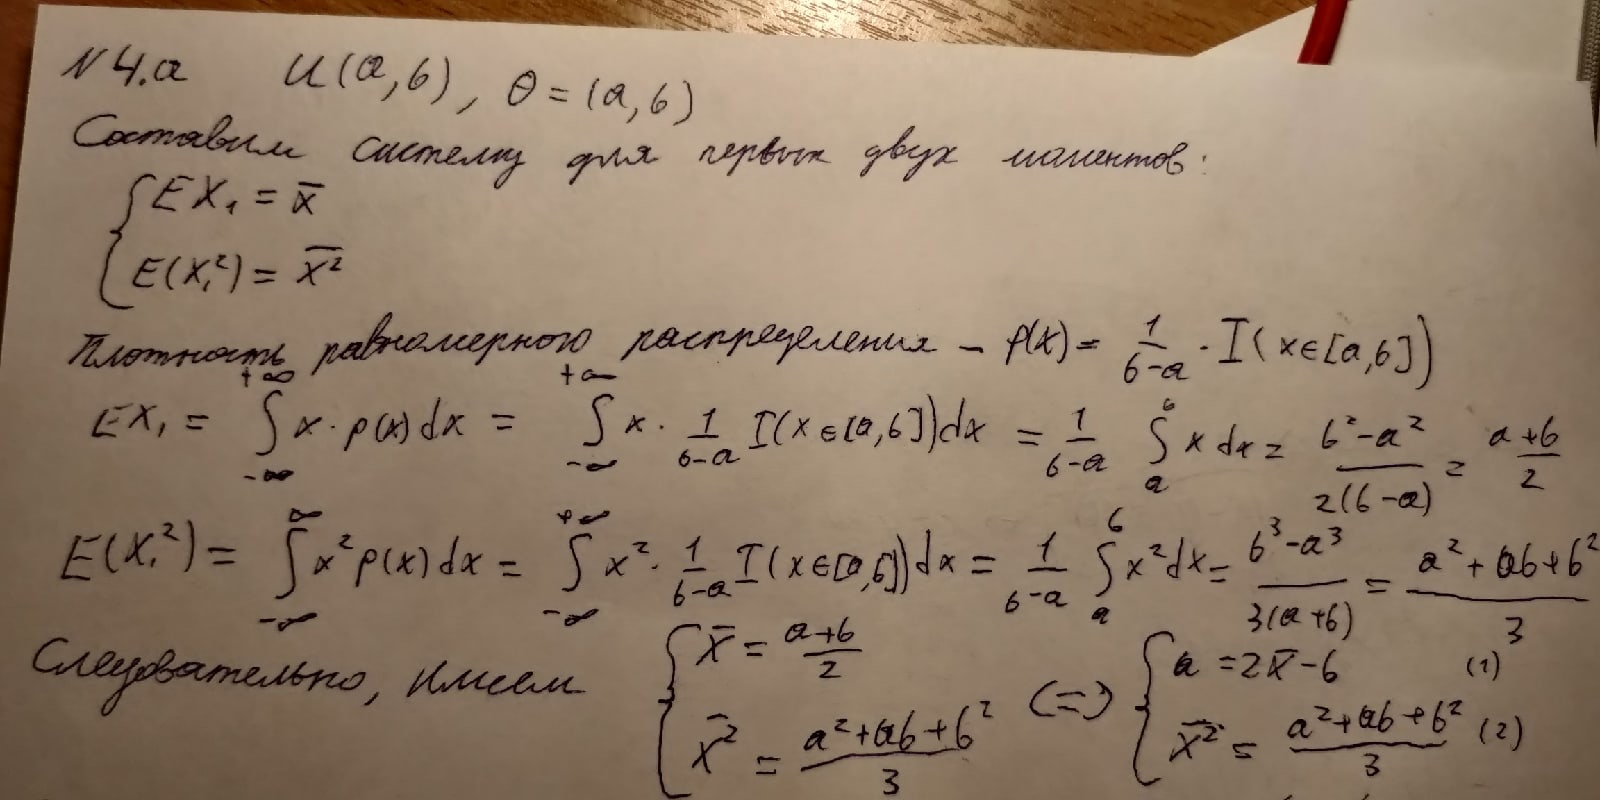

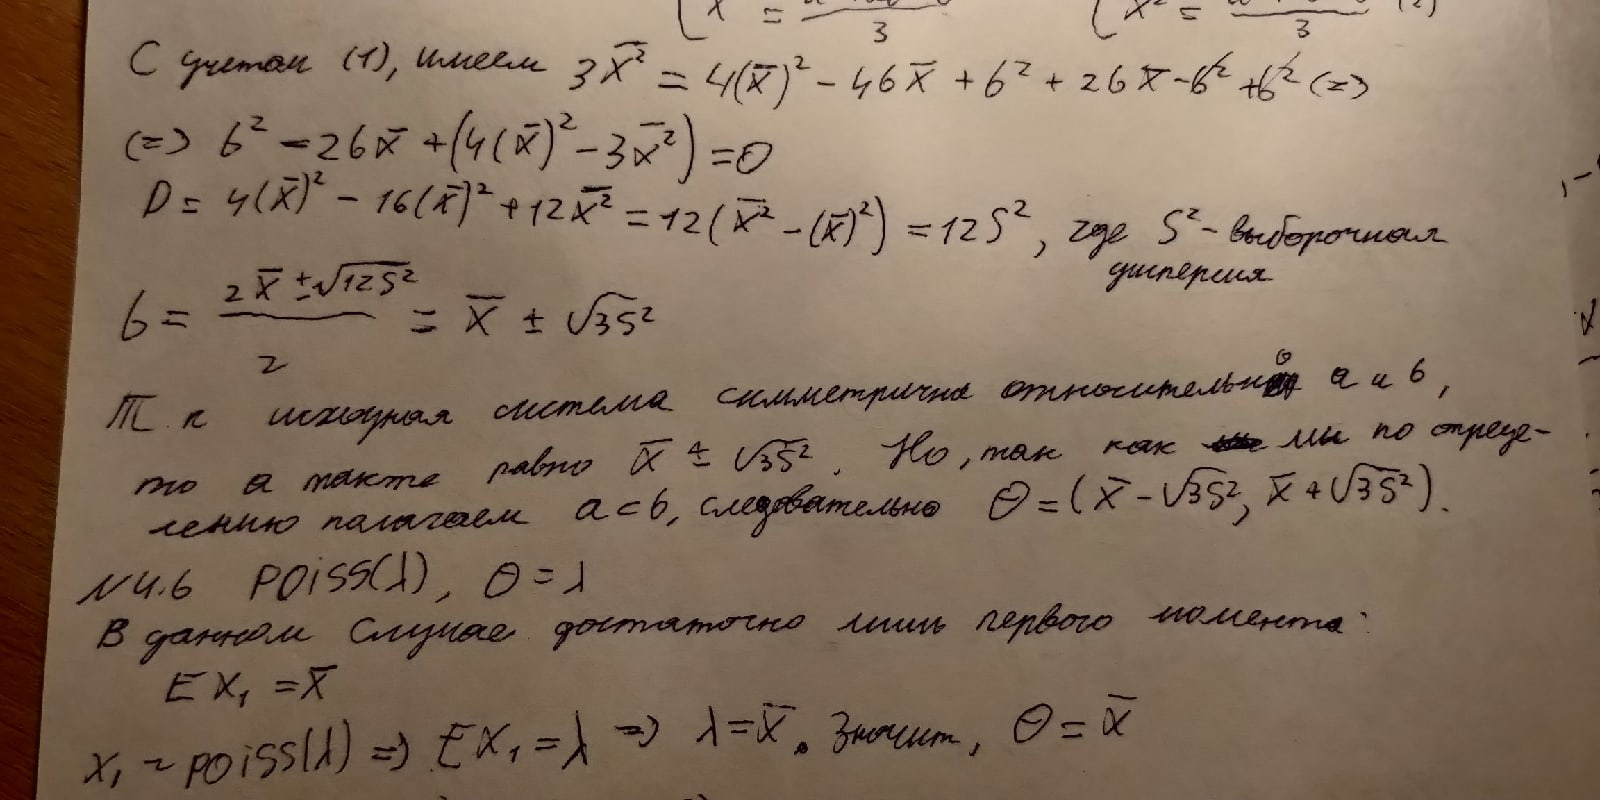

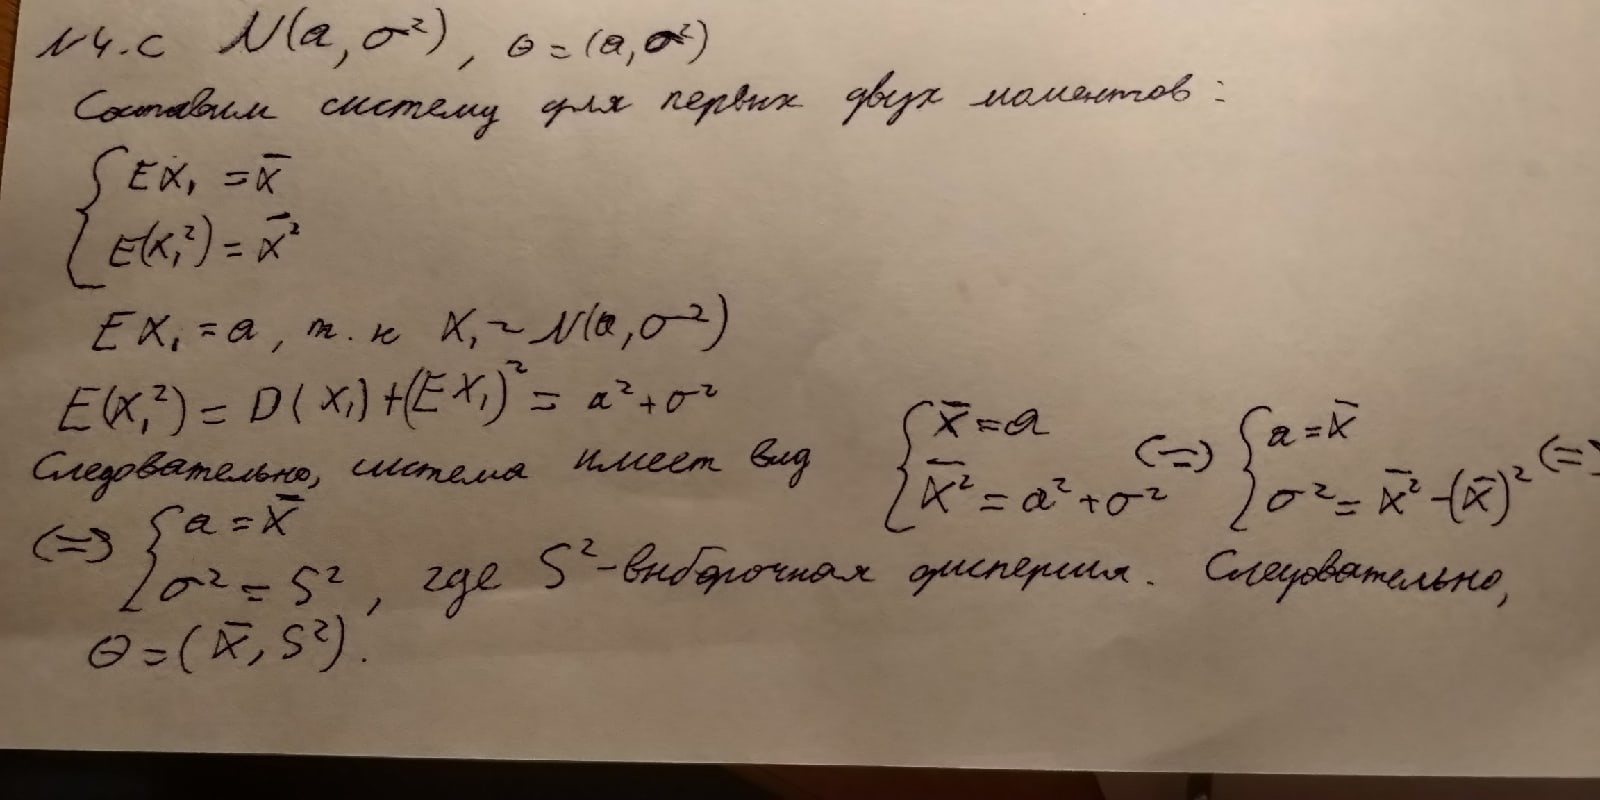

---
### Задача 5.

В данной задаче вам предстоит распарсить сайт, который вы выберите.

**1.** Каждая ссылка (URL) в интернете состоит из нескольких компонент:

* схема, *например, `http` или `https`*,
* хост, *наример, `en.wikipedia.org`*
* путь, по которому находится информация,
* параметры,
* якорь &mdash; указание фрагмента страницы.

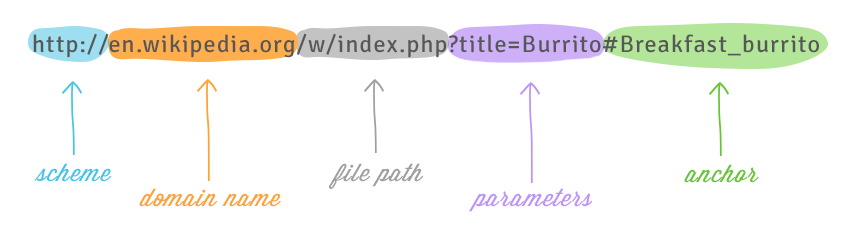

Одна и та же ссылка может иметь несколько форм и вести на ту же самую страницу. Во время обхода сайта это надо учитывать и сохранять один уникальный урл для каждой страницы. Процедура, приводящая урл к каноничному виду, называется нормализацией.
Процедуры, которые применяются к урлу для нормализации, описаны, например, на <a target="_blank" href="https://ru.wikipedia.org/wiki/%D0%9D%D0%BE%D1%80%D0%BC%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F_URL">Википедии</a>.

Установите пакет `url_normalize`, в котором есть готовая функция для нормализации.

Прочитайте, как именно функция `url_normalize` меняет ссылку, и приведите примеры $4$ урлов, которые нормализуются к одному и тому же. Примеры должны демонстрировать различные этапы процедуры нормализации. Одним из этих примеров может быть сам нормализованный урл.

In [51]:
from url_normalize import url_normalize

In [52]:
%%latex
$
https://ejudge.atp-fivt.org/client?SID=3ca3fb0d73201667&action=94
https://Ejudge.Atp-Fivt.org/client?SID=3ca3fb0d73201667&action=94
https://Ejudge.Atp-Fivt.org:443/client?SID=3ca3fb0d73201667&action=94
https://ejudge.atp%2Dfivt.org/client?SID=d9abaa03feeb9167&Action=94
$

<IPython.core.display.Latex object>

_____________
Изучите код, в котором скачиваются страницы сайта `simple.wikipedia.org` с <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/data_parsing.html">занятия про парсинг данных</a>. Код, реализующий обход в ширину с фильтрацией и нормализацией урлов, приведён в виде функции.

In [53]:
from urllib.parse import urlparse, urldefrag, urljoin
from urllib.request import urlopen
from bs4 import BeautifulSoup
from queue import Queue
import time

In [54]:
SEED = "https://simple.wikipedia.org/wiki/Data_science"

def download_from_the_internet(url):
    '''Скачивает сраницу с интернета

    Параметры:
        url (str) - ссылка на страницу для скачивания

    Возвращает:
        str - html-страница в виде строки, None в случае неудачи
    '''
    try:
        return urlopen(url).read().decode('utf-8')
    except KeyboardInterrupt:
        raise
    except:
        return None

    
def extract_links_from_html(url, html):
    '''Парсит ссылки на странице

    Принимает:
        url (str) - исходный урл страницы
        html (str) - содержание html-страницы

    Возвращает:
        list - список ссылок, находящихся на странице
    '''
    parser = BeautifulSoup(html)
    # Формируем ссылки на те страницы, на которые ссылается документ
    return [urljoin(url, link.get('href')) for link in parser.findAll('a')]


def extract_text_info_from_html(html):
    '''Парсит текстовую информацию на страницу

    Принимает:
         html (str) - содержание html-страницы

    Возвращает:
        dict - текстовая часть страницы по ключу text,
               название по ключу title
    '''
    soup = BeautifulSoup(html, features="html.parser")
    for script in soup(["script", "style"]):
        script.extract()
    
    # Объединяем строки текста
    text = soup.get_text()
    lines = (line.strip() for line in text.splitlines())
    chunks = (phrase.strip() for line in lines for phrase in line.split("  "))
    text = '\n'.join(chunk for chunk in chunks if chunk)

    # Находим название на странице
    title = soup.find('title').string
    
    return {'text': text, 'title': title}
    

def is_wiki_article(url):
    '''Проверяет, является ли ссылка страницей на simple.wikipedia'''
    if 'simple.wikipedia' not in url:
        return False
    
    prohibited = ['Category', 'Special', 'Wikipedia',
                  'php', 'Help']
    
    # Проверяем, есть ли запрещённые строки в ссылке
    for token in prohibited:
        if token in url:
            return False
        
    return True

In [55]:
def is_en_wiki_article(url):
    '''Проверяет, является ли ссылка страницей на wikipedia'''
    if 'wikipedia' not in url or not url.startswith('https://en.') or url.find('#') != -1:
        return False
    
    prohibited = ['Category', 'Special', 'Wikipedia',
                  'php', 'Help']
    
    for token in prohibited:
        if token in url:
            return False
        
    return True

Код обхода в ширину:

In [56]:
def load_web_pages(seed, max_downloads, filtration_function):
    '''Обходит web-страницы в ширину и загружает информацию о них.
    
    Принимает:
        seed (str) -- страница, с которой начинать обход.
        max_downloads (int) -- максимальное число загруженных страниц.
        filtration_function (str -> bool) -- функция, указывающая, 
            стоит ли загружать страницу. Пример: is_wiki_article.
            
    Возвращает:
        pages_json (list) - список словарей с информацией о страницах.
    '''
    
    # Создаём список со страницами
    pages_json = []
    
    # Создаём очередь для обхода в ширину
    q = Queue()
    q.put(seed)

    already_visited = set()
    n_downloads = 0
    time_start = time.time()

    while not q.empty():
        # Нормализуем урл
        main_url = url_normalize(q.get())
        if main_url in already_visited:
            continue
        already_visited.add(main_url)
        html = download_from_the_internet(main_url)

        # Извлекаем ссылки из страницы
        children_links = extract_links_from_html(main_url, html)
        time.sleep(1)

        # Извлекаем текст страницы
        text_info = extract_text_info_from_html(html) 

        # Добавляем запись в таблицу
        text_info['url'] = main_url
        text_info['html'] = html
        pages_json.append(text_info)

        n_downloads += 1
        if n_downloads > max_downloads:
            break

        # Добавляем ещё не посещённые ссылки в очередь
        for child in children_links:
            if url_normalize(child) not in already_visited \
            and filtration_function(child):
                q.put(child)
                
    return pages_json

**2.** Выберите сайт, который вам интересен, а также некоторую категорию страниц в нём. Поймите, с какой страницы сайта надо начать обход, чтобы обходить сайты данной категории.

*Пример: ищем статьи про Data Science на Википедии, начинаем со статьи Data Dcience*.

**Укажите, что выбрали:** Будем искать статьи про футбол, начнем со статьи https://en.wikipedia.org/wiki/Association_football

Придумайте критерий, который по тексту из HTML-страницы будет определять, находится ли страница в определённой вами категории.

*Пример: статья на Википедии про Data Science, если в ней есть слово "data" или термины из статистики, теории вероятностей и анализа данных*.

**Опишите критерий:** Статья из википедии про футбол, если есть слово football.

Начав с выбранной страницы, скачайте не менее $500$ страниц сайта. В качестве функции фильтрации возьмите функцию, которая отделяет страницы с выбранного сайта от других.

In [57]:
seed = 'https://en.wikipedia.org/wiki/Association_football'
max_download = 600

In [58]:
raw_data = []

In [385]:
raw_data = load_web_pages(seed, max_download, is_en_wiki_article)

In [386]:
with open('fifth.json', 'w') as outfile:
    json.dump(raw_data, outfile)

In [59]:
with open('fifth.json', 'r') as infile:
    raw_data = json.load(infile)

Cделайте таблицу со следующей информацией:

* количество слов в тексте статьи;
* принадлежит ли страница выбранной категории.

Для последнего пункта можете воспользоваться функцией поиска слов по заданным префиксам, рассмотренной на <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/data_parsing.html">занятии</a>.

In [60]:
def take_info(raw_data):
    list_to_frame = []
    for link in raw_data:
        words_num = len(for_regular.split('[^a-zA-Zа-яА-Я]', link['text']))
        is_contain_football = bool(link['text'].find('football') != -1)
        dat = {
            'page': link['title'],
            'words_number': words_num,
            'is_in_category': is_contain_football,
            'number_of_links': len(extract_links_from_html(link['url'], link['html']))
        }
        list_to_frame.append(dat)
    frame = pd.DataFrame(list_to_frame).set_index('page')
    return frame

In [61]:
table = take_info(raw_data)
table

words_number  is_in_category  \
page                                                                            
Association football - Wikipedia                        18392            True   
File:Football (soccer) Part One.ogg - Wikipedia          1187            True   
Soccer (disambiguation) - Wikipedia                       368            True   
Soccer Team (band) - Wikipedia                            864           False   
Football - Wikipedia                                    24211            True   
...                                                       ...             ...   
1930 in association football - Wikipedia                 2210            True   
1931 in association football - Wikipedia                 1979            True   
1932 in association football - Wikipedia                 1842            True   
1933 in association football - Wikipedia                 1781            True   
1934 in association football - Wikipedia                 1967            True   

                                                 number_of_links  
page                                                              
Association football - Wikipedia                            2179  
File:Football (soccer) Part One.ogg - Wikipedia               90  
Soccer (disambiguation) - Wikipedia                           75  
Soccer Team (band) - Wikipedia                               123  
Football - Wikipedia                                        1979  
...                                                          ...  
1930 in association football - Wikipedia                     386  
1931 in association football - Wikipedia                     349  
1932 in association football - Wikipedia                     343  
1933 in association football - Wikipedia                     334  
1934 in association football - Wikipedia                     355  

[601 rows x 3 columns]

Определите, какой процент скачанных страниц принадлежит выбранной категории?

In [57]:
part = table[table['is_in_category']].shape[0] / table.shape[0] 
print('Процент страниц, принадлежащих выбранной категории, составляет', np.round(part * 100, decimals = 1))

Процент страниц, принадлежащих выбранной категории, составляет 93.3


C помощью гистограмм сравните визуально распределения количества слов в статьях из выбранной категории и во всех остальных. Для этих двух распределений вычислите средние, медианы и дисперсии. Средние и медианы отобразите на графиках с гистограммами. Сделайте выводы.

In [58]:
category_pages = table[table['is_in_category']]
not_category_pages = table[table['is_in_category'] == False]

Среднее количество слов в статьях из категории равно 6993.3119429590015
Медианное количество слов в статьях из категории равно 3628.0


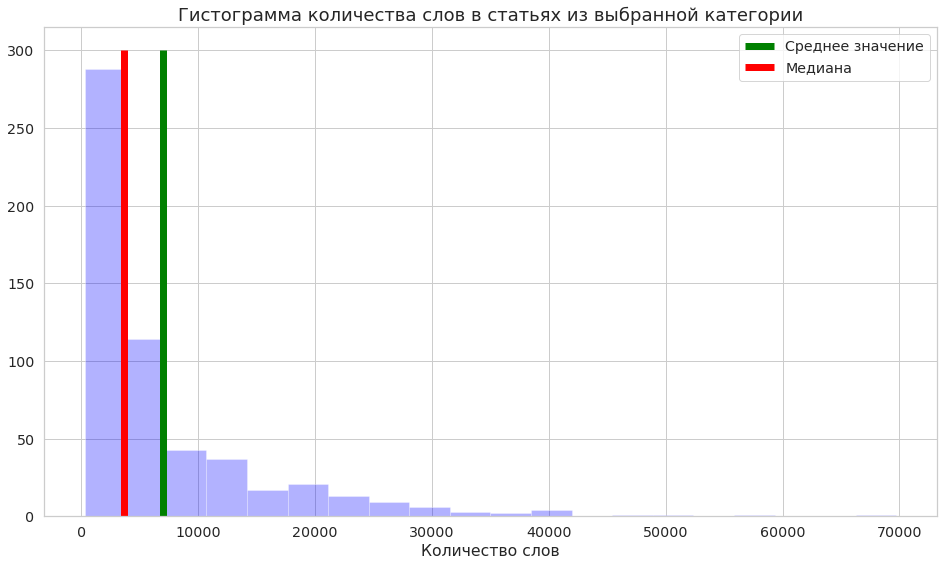

In [59]:
mean_val1 =category_pages['words_number'].mean()
med_val1 = category_pages['words_number'].median()
print('Среднее количество слов в статьях из категории равно', mean_val1)
print('Медианное количество слов в статьях из категории равно', med_val1)
plt.figure(figsize = (16,9))
plt.hist(
    category_pages['words_number'],
    bins = 20,
    alpha = 0.3,
    color = 'blue'
)
plt.vlines(mean_val1,0, 300,linewidth=7, color = 'green', label = "Среднее значение")
plt.vlines(med_val1,0, 300,linewidth=7, color = 'red', label = "Медиана")
plt.title('Гистограмма количества слов в статьях из выбранной категории', fontsize = 18)
plt.xlabel('Количество слов')
plt.legend()
plt.show()

Среднее количество слов в статьях из категории равно 14638.45
Медианное количество слов в статьях из категории равно 7092.0


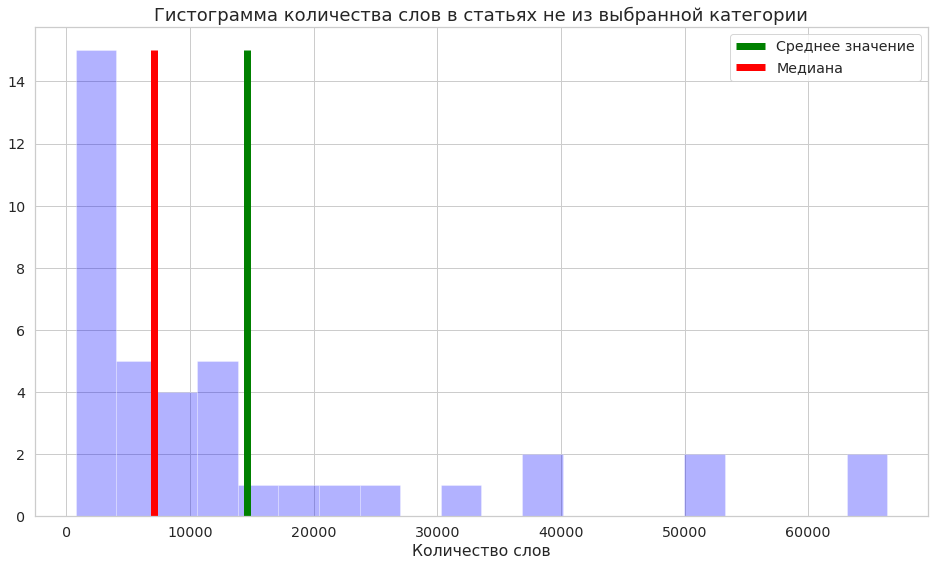

In [60]:
mean_val2 = not_category_pages['words_number'].mean()
med_val2 = not_category_pages['words_number'].median()
print('Среднее количество слов в статьях из категории равно', mean_val2)
print('Медианное количество слов в статьях из категории равно', med_val2)
plt.figure(figsize = (16,9))
plt.hist(
    not_category_pages['words_number'],
    bins = 20,
    alpha = 0.3,
    color = 'blue'
)
plt.vlines(mean_val2,0, 15,linewidth=7, color = 'green', label = "Среднее значение")
plt.vlines(med_val2,0, 15,linewidth=7, color = 'red', label = "Медиана")
plt.title('Гистограмма количества слов в статьях не из выбранной категории', fontsize = 18)
plt.xlabel('Количество слов')
plt.legend()
plt.show()

In [61]:
disp1 = np.array(category_pages['words_number']).std() ** 2
disp2 = np.array(not_category_pages['words_number']).std() ** 2
print('Дисперсия количества слов в статьях из категории равно', np.round(disp1, 1))
print('Дисперсия количества слов в статьях не из категории равно', np.round(disp2, 1))

Дисперсия количества слов в статьях из категории равно 74062830.5
Дисперсия количества слов в статьях не из категории равно 304771170.2


Постройте boxplot-графики для того, чтобы сравнить эти 2 распределения. Какой способ сравнения кажется вам более удобным?

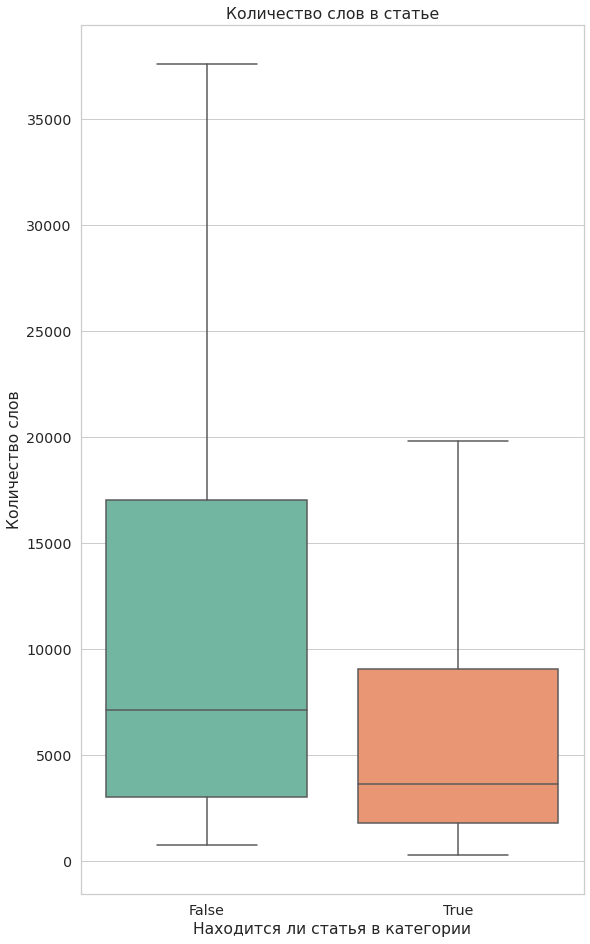

In [62]:
plt.figure(figsize = (9,16))
views_graph = sns.boxplot(x = 'is_in_category', y = 'words_number', data = table, showfliers = False)
views_graph.set_title('Количество слов в статье')
views_graph.set(xlabel = 'Находится ли статья в категории', ylabel = 'Количество слов')
plt.show()

**3.** При помощи `plotly` визуализируйте скачанные страницы сайта. В качестве значений по осям возьмите количество слов на странице и количество ссылок на ней. Цветом обозначьте принадлежность выбранной вами категории. При наведении курсора на точку, обозначающую страницу, должна появляться подсказка с названием этой страницы.

In [63]:
table = table.reset_index()


In [65]:
fig = px.scatter(table, x = 'words_number', y = 'number_of_links',
                 color = 'is_in_category', hover_data = ['page'], range_x = [0,40000], range_y = [0, 4000])
fig.update_layout(
    title="Зависимость количества ссылок от количетва слов в статье",
    yaxis_title='Количество ссылок',
    xaxis_title='Количество слов',
)
fig.show()

**4.** Предложите функцию фильтрации web-страниц, которую нужно подать в `load_web_pages`, чтобы среди скачанных сайтов был больше процент страниц из выбранной вами категории.

Улучшим нашу функцию фильтрации так: будем заходить только на те страницы, где в названии есть слово football. Это должно быть хорошим и простым решением, так как в английском языке нет склонений, а также так как название входит в контент web-страницы. Ожидаемый результат -- 100%

In [66]:
def better_filter_func(url):
    if 'wikipedia' not in url or not url.startswith('https://en.') or url.find('#') != -1 \
    or url.find('football') == -1:
        return False
    
    prohibited = ['Category', 'Special', 'Wikipedia',
                  'php', 'Help']
    
    # Проверяем, есть ли запрещённые строки в ссылке
    for token in prohibited:
        if token in url:
            return False
        
    return True

Скачайте снова не менее $500$ страниц, но уже с новой функцией фильтрации. Добавьте следующую информацию к каждой странице:

* глубина в обходе,
* время скачивания страницы.

Для замера времени можете воспользоваться функцией `time` из пакета `time`.

In [67]:
def load_web_pages_new(seed, max_downloads, filtration_function):
    '''Обходит web-страницы в ширину и загружает информацию о них.
    
    Принимает:
        seed (str) -- страница, с которой начинать обход.
        max_downloads (int) -- максимальное число загруженных страниц.
        filtration_function (str -> bool) -- функция, указывающая, 
            стоит ли загружать страницу. Пример: is_wiki_article.
            
    Возвращает:
        pages_json (list) - список словарей с информацией о страницах.
    '''
    
    # Создаём список со страницами
    pages_json = []
    
    # Создаём очередь для обхода в ширину
    q = Queue()
    q.put({'url':seed, 'depth': 0})

    already_visited = set()
    n_downloads = 0
    time_start = time.time()

    while not q.empty():
        # Нормализуем урл
        elem = q.get()
        depth = elem['depth']
        url = elem['url']
        main_url = url_normalize(url)
        if main_url in already_visited:
            continue
        already_visited.add(main_url)
        start_time = time.time()
        html = download_from_the_internet(main_url)
        end_time = time.time()
        # Извлекаем ссылки из страницы
        children_links = extract_links_from_html(main_url, html)
        time.sleep(0.5)

        # Извлекаем текст страницы
        text_info = extract_text_info_from_html(html) 

        # Добавляем запись в таблицу
        text_info['url'] = main_url
        text_info['html'] = html
        text_info['time'] = end_time - start_time
        text_info['depth'] = depth
        pages_json.append(text_info)

        n_downloads += 1
        if n_downloads > max_downloads:
            break

        # Добавляем ещё не посещённые ссылки в очередь
        for child in children_links:
            if url_normalize(child) not in already_visited \
            and filtration_function(child):
                q.put({'url': child, 'depth': depth + 1})
                
    return pages_json

In [68]:
seed = 'https://en.wikipedia.org/wiki/Association_football'
max_download = 600
new_raw_data = []

In [43]:
new_raw_data = load_web_pages_new(seed,max_download, better_filter_func)

In [44]:
with open('fifth_updated.json', 'w') as outfile:
    json.dump(new_raw_data, outfile)

In [69]:
with open('fifth_updated.json', 'r') as infile:
    new_raw_data = json.load(infile)

In [70]:
def take_info_new(raw_data):
    list_to_frame = []
    for link in raw_data:
        words_num = len(for_regular.split('[^a-zA-Zа-яА-Я]', link['text']))
        is_contain_football = bool(link['text'].find('football') != -1)
        dat = {
            'page': link['title'],
            'words_number': words_num,
            'is_in_category': is_contain_football,
            'number_of_links': len(extract_links_from_html(link['url'], link['html'])),
            'time': link['time'],
            'depth': link['depth']
        }
        list_to_frame.append(dat)
    frame = pd.DataFrame(list_to_frame).set_index('page')
    return frame

In [71]:
pages_info = take_info_new(new_raw_data)

In [72]:
pages_info.head(10)

words_number  \
page                                                               
Association football - Wikipedia                           18392   
History of association football - Wikipedia                10913   
Ball (association football) - Wikipedia                     5692   
Glossary of association football terms - Wikipedia         32758   
Scoring in association football - Wikipedia                 7145   
Laws of the Game (association football) - Wikip...          6868   
Goalkeeper (association football) - Wikipedia              11773   
Penalty shoot-out (association football) - Wiki...         18122   
Captain (association football) - Wikipedia                  2413   
Penalty kick (association football) - Wikipedia             8628   

                                                    is_in_category  \
page                                                                 
Association football - Wikipedia                              True   
History of association football - Wikipedia                   True   
Ball (association football) - Wikipedia                       True   
Glossary of association football terms - Wikipedia            True   
Scoring in association football - Wikipedia                   True   
Laws of the Game (association football) - Wikip...            True   
Goalkeeper (association football) - Wikipedia                 True   
Penalty shoot-out (association football) - Wiki...            True   
Captain (association football) - Wikipedia                    True   
Penalty kick (association football) - Wikipedia               True   

                                                    number_of_links      time  \
page                                                                            
Association football - Wikipedia                               2179  0.351939   
History of association football - Wikipedia                    1032  0.290169   
Ball (association football) - Wikipedia                         891  0.332640   
Glossary of association football terms - Wikipedia             2371  0.333315   
Scoring in association football - Wikipedia                     453  0.259523   
Laws of the Game (association football) - Wikip...              587  0.261962   
Goalkeeper (association football) - Wikipedia                  1058  0.323747   
Penalty shoot-out (association football) - Wiki...             1169  0.299367   
Captain (association football) - Wikipedia                      402  0.232320   
Penalty kick (association football) - Wikipedia                 545  0.280577   

                                                    depth  
page                                                       
Association football - Wikipedia                        0  
History of association football - Wikipedia             1  
Ball (association football) - Wikipedia                 1  
Glossary of association football terms - Wikipedia      1  
Scoring in association football - Wikipedia             1  
Laws of the Game (association football) - Wikip...      1  
Goalkeeper (association football) - Wikipedia           1  
Penalty shoot-out (association football) - Wiki...      1  
Captain (association football) - Wikipedia              1  
Penalty kick (association football) - Wikipedia         1

In [59]:
part = pages_info[pages_info['is_in_category']].shape[0] / table.shape[0] 
print('Процент страниц, принадлежащих выбранной категории, составляет', np.round(part * 100, decimals = 1))

Процент страниц, принадлежащих выбранной категории, составляет 100.0


Постройте гистограмму и ядерную оценку плотности для времени скачивания страницы.

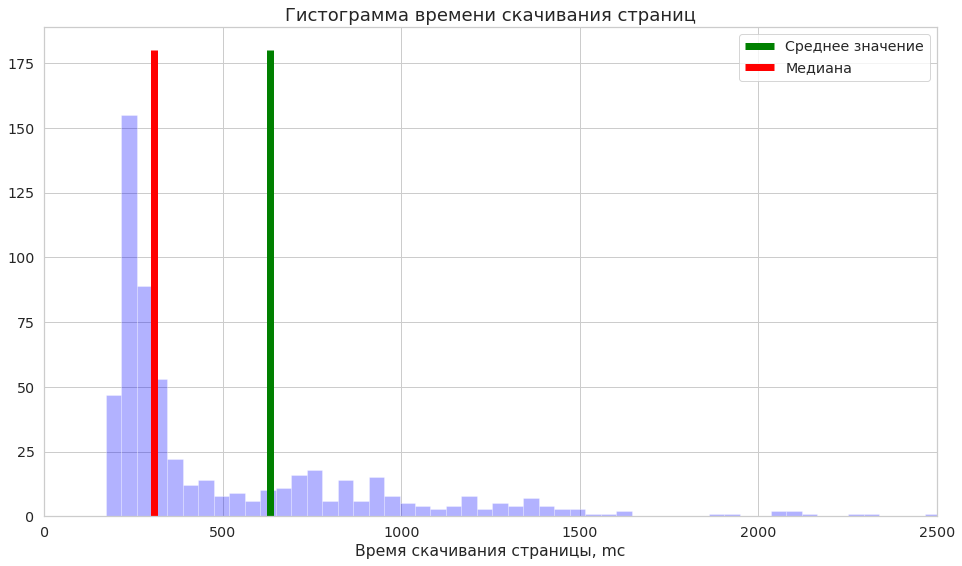

In [60]:
mean_time = pages_info['time'].mean()
median_time = pages_info['time'].median()
plt.figure(figsize = (16,9))
plt.hist(
   pages_info['time'] * 1000,
    bins = 300,
    alpha = 0.3,
    color = 'blue'
)
plt.xlim(0, 2500)
plt.vlines(mean_time * 1000,0, 180,linewidth=7, color = 'green', label = "Среднее значение")
plt.vlines(median_time * 1000,0, 180,linewidth=7, color = 'red', label = "Медиана")
plt.title('Гистограмма времени скачивания страниц', fontsize = 18)
plt.xlabel('Время скачивания страницы, mc')
plt.legend()

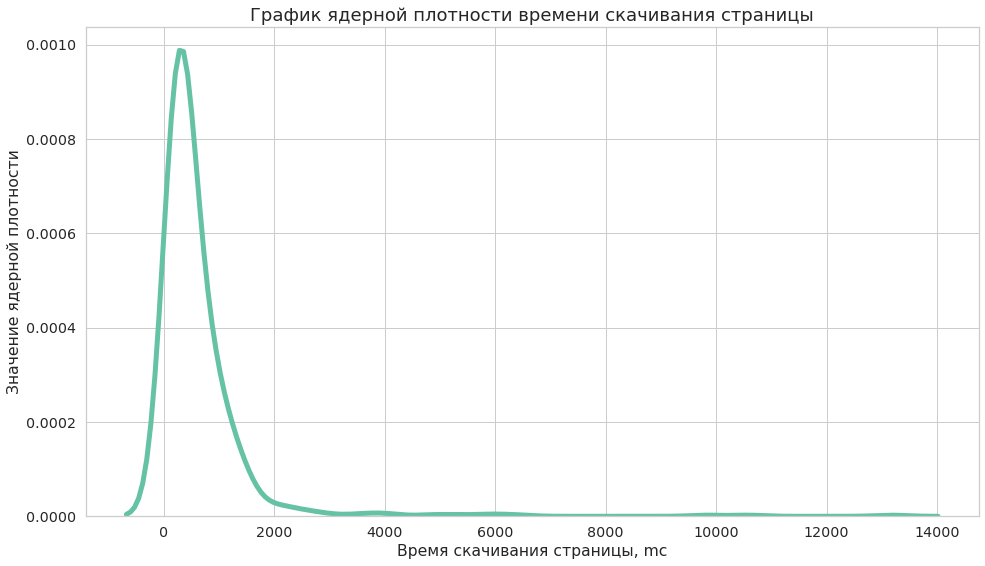

In [73]:
with sns.plotting_context(font_scale=1.5), sns.axes_style('whitegrid'):
    plt.figure(figsize = (16,9))
    sns.kdeplot(pages_info['time'] * 1000,linewidth=5)
    plt.title('График ядерной плотности времени скачивания страницы', fontsize = 18)
    plt.ylabel('Значение ядерной плотности')
    plt.xlabel('Время скачивания страницы, mc')

Какими известными вам стандартными распределениями оно может быть приближено? Найдите оценку параметров этого распределения по методу моментов и отобразите на графике плотность с полученными значениями параметров.

*Замечание.* Результат сильно зависит от сайта, железа и прочих характеристик. По идее должно получится неплохое приближение чем-то из того, что вам известно. Но если ничего не получится, то просто оставьте и прокомментируйте ваши попытки разобраться.

Из графиков можно попробовать предположить, что время скачивания может быть приближено распределением случайной величины имеющий экспоненциальное распределение, с некоторым сдвигом по оси OX. Константу сдвига потом подберем отдельно, так как очевидно, что она не будет влиять на оценку в методе моментов. По методу моментов найдем оценку параметра экспоненциального распределения: 

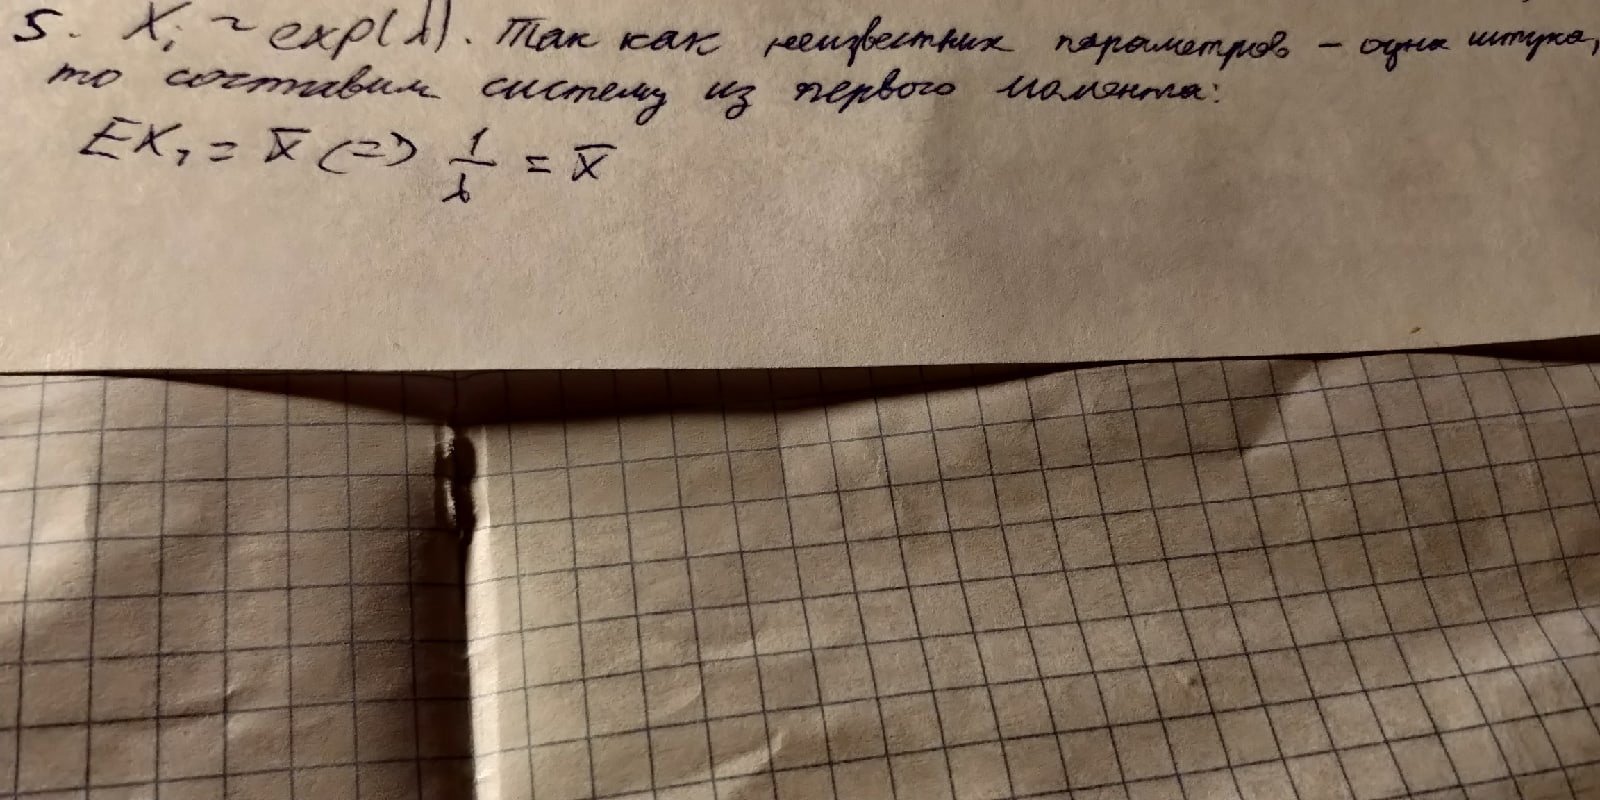

In [74]:
lam = 1 / pages_info['time'].mean()
lam

1.5811101633150668

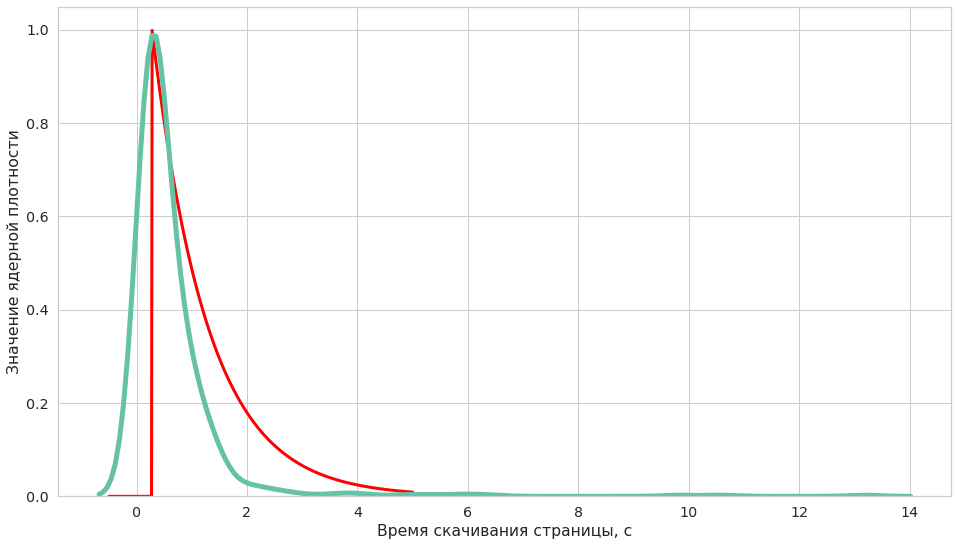

In [75]:
shift = 1.3
plt.figure(figsize = (16,9))
grid = np.linspace(-0.5, 5, 500)
plt.plot(
    grid,
    sps.expon(lam).pdf(grid + shift),
    color="red",
    linewidth=3,
    label=""
)
sns.kdeplot(pages_info['time'],linewidth=5)
plt.ylabel('Значение ядерной плотности')
plt.xlabel('Время скачивания страницы, с')
plt.show()

При сдвиге на 1.3 секунды графики плотности экспоненциального распределения и ядерной плотности распределения времени скачивания страницы имеют общую структуру.

**Выводы:** Из графиков можно сделать вывод, что время скачивания страницы прямо пропорционально времени скачивания страницы. C помощью метода моментов, а также подсчета ядерной плотности мы можем предположить, что количество слов на странице имеет экспоненциальное распределение.